#### Rome Business School
Titanic Dataset — Wrangling

In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\KISSZABO'

In [3]:
df = pd.read_csv('C:/Users/KISSZABO/OneDrive - UNHCR/Documents/Programming/titanic.csv')
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
#let's look at the number of rows and columns
df.shape

(891, 12)

In [5]:
#Let's look at the data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#Let's describe the most important characteristics of the data
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
!pip install missingno

In [8]:
import missingno as msno

<AxesSubplot:>

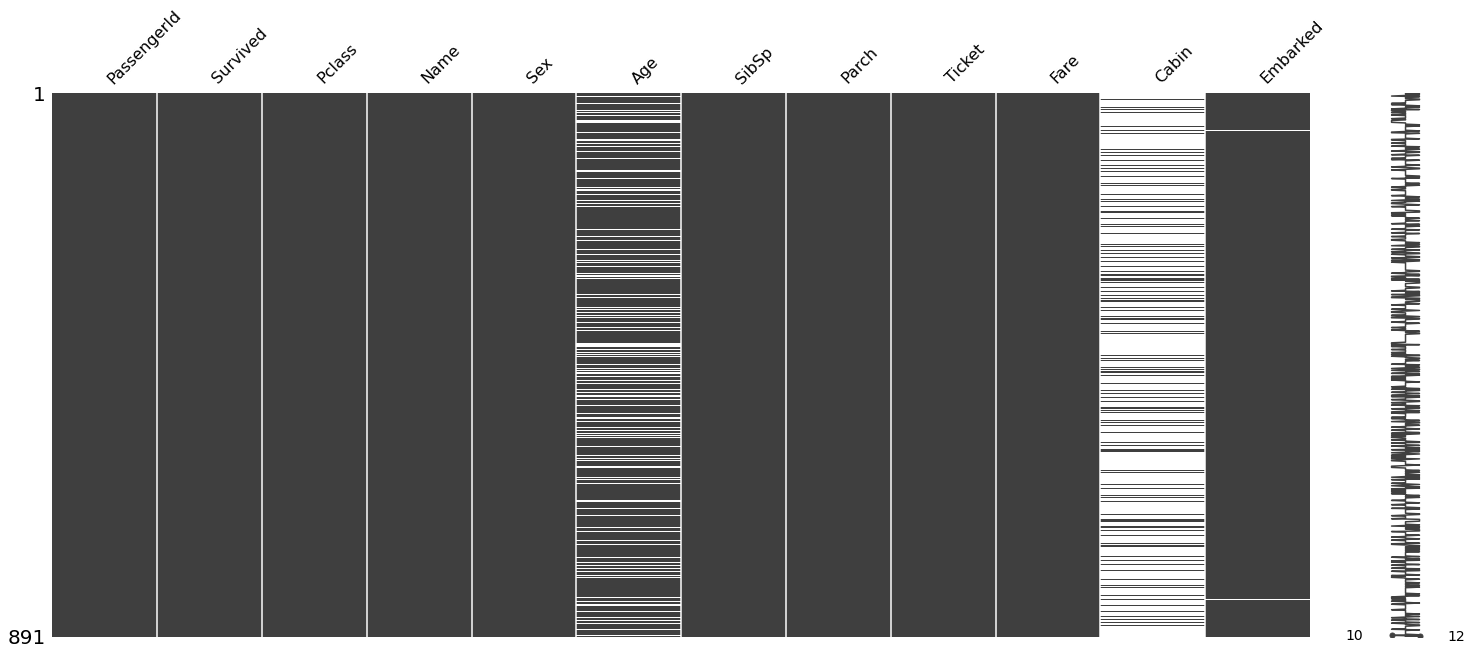

In [9]:
#Looking at missing values with matrix visualization
msno.matrix(df)

<AxesSubplot:>

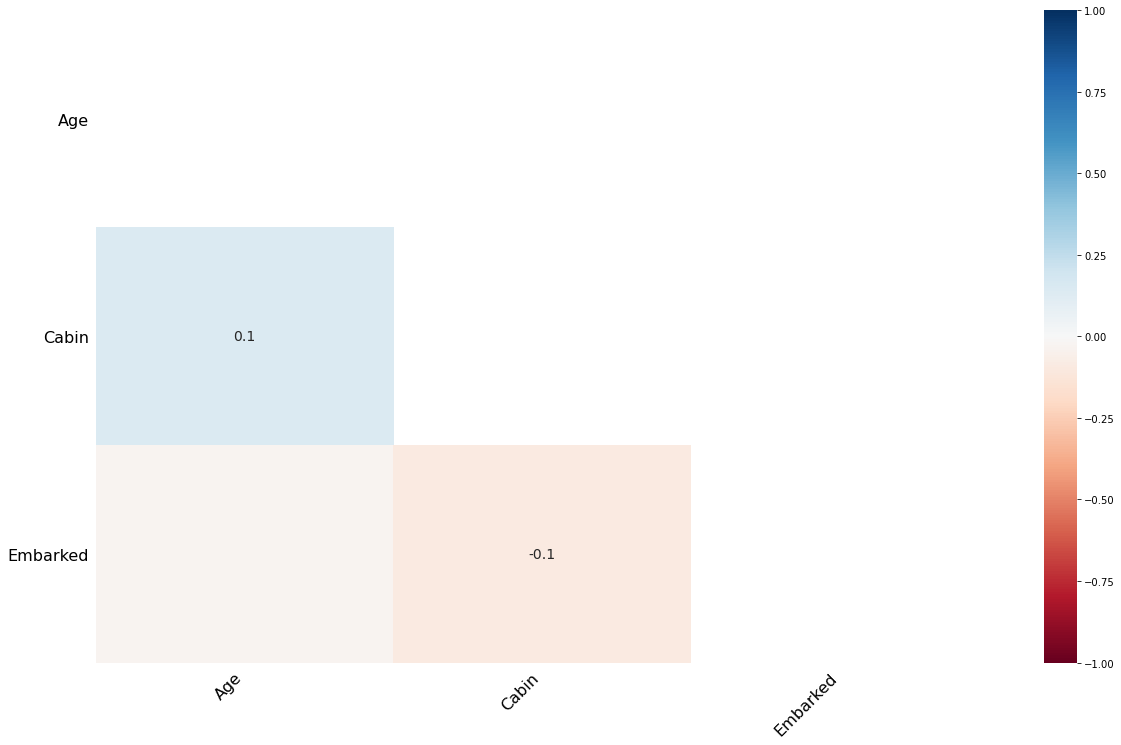

In [10]:
#Let's create a heatmap of the missing values
msno.heatmap(df)

In [11]:
import matplotlib.pyplot as plt #Data Visualization
%matplotlib notebook 

In [12]:
import seaborn as sns # Data Visualization

#### We want to find out whether passengers distribute equally among victims and survivors

In [13]:
survived_count = df.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

<IPython.core.display.Javascript object>


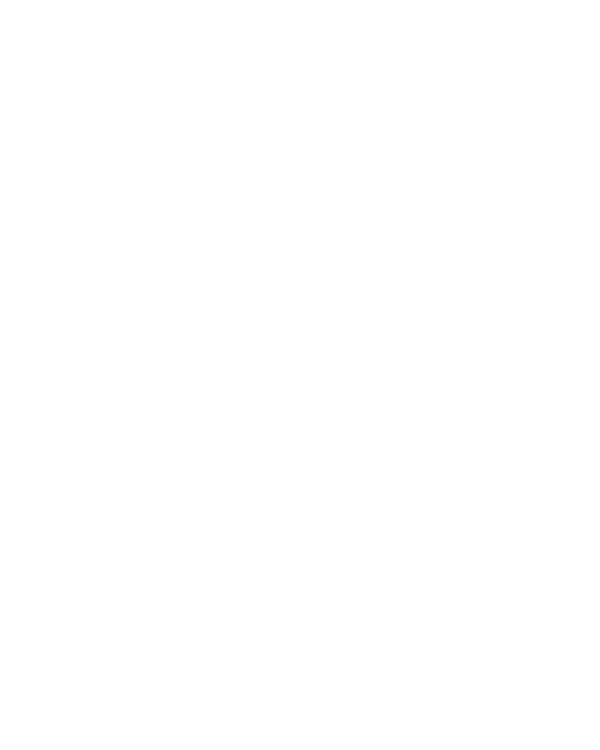

In [14]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by Survival')
plt.xticks([0,1],['Not survived', 'Survived'])
plt.show()

In [15]:
#let's try seaborn
sns.countplot(x='Survived', data=df);

#### Understanding feature Distribution

In [16]:
pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [17]:
plt.figure(figsize=(7,7))
plt.title('Grouped by Pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3']),
autpct='%1.1f%%', textprops={'fontsize':13}
plt.show()

SyntaxError: cannot assign to literal (<ipython-input-17-916aca42a2f1>, line 4)

<IPython.core.display.Javascript object>


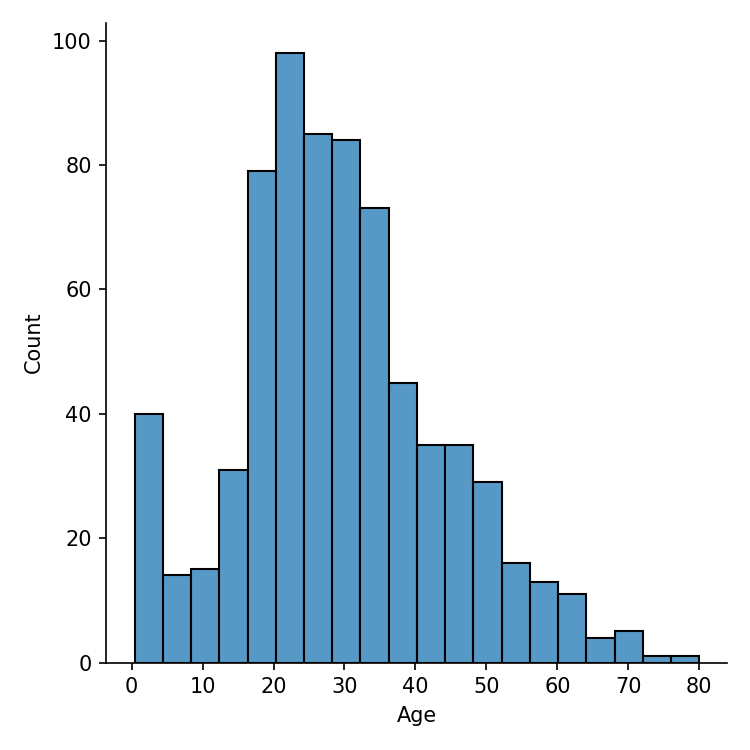

In [18]:
sns.displot(x='Age', data=df);

### Univariate Analysis —  Understanding Feature Distribution
#### When the number of dataset columns is limited, it makes sense to distribute all features on the same figure.

<IPython.core.display.Javascript object>


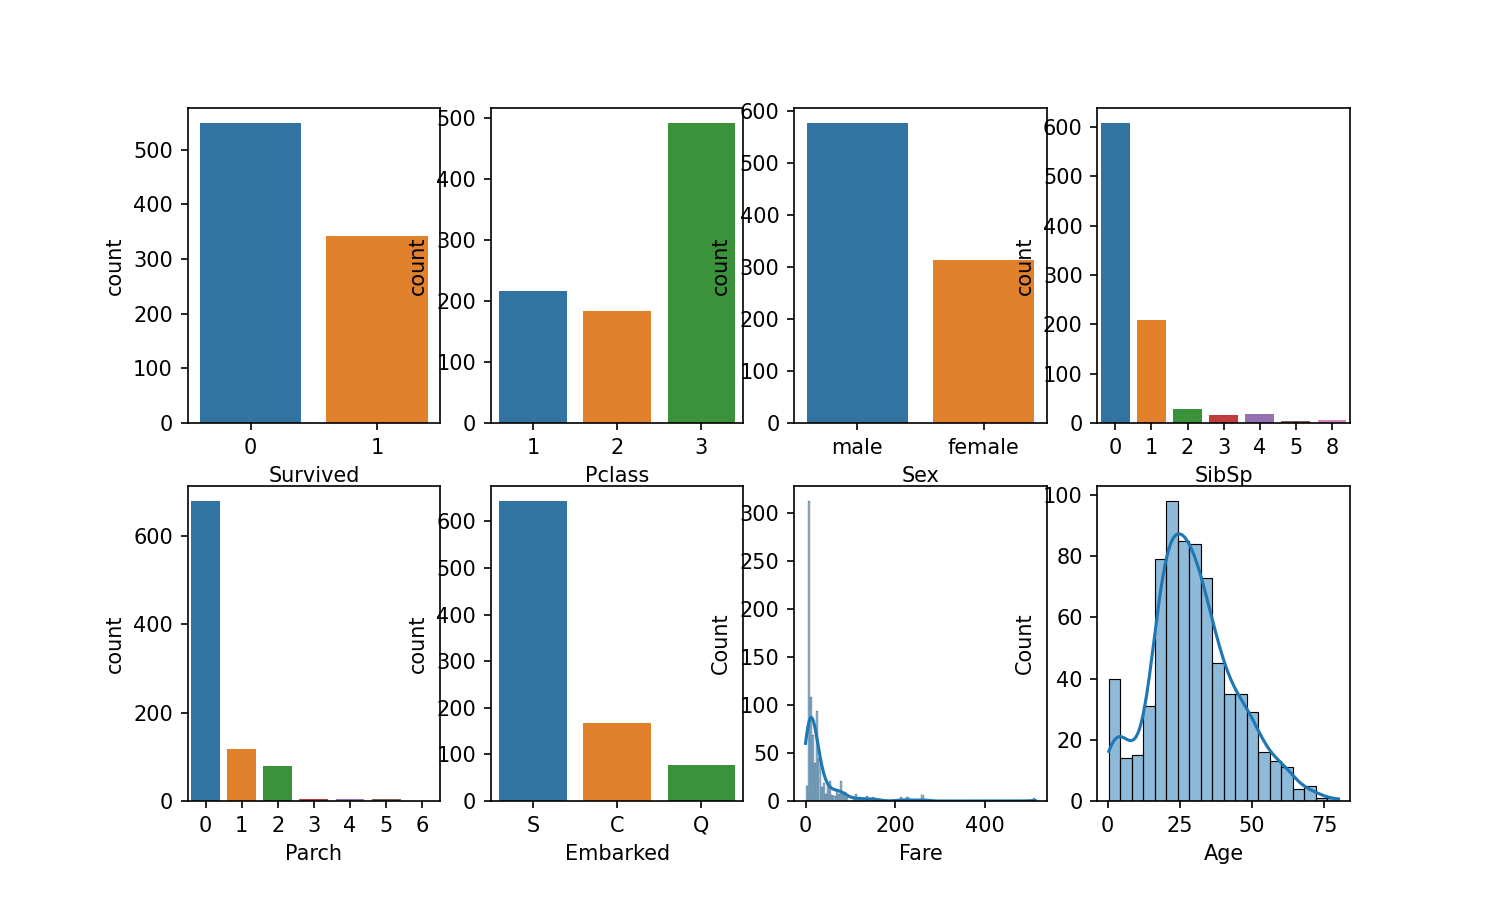

<AxesSubplot:xlabel='Age', ylabel='Count'>

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
sns.countplot(x='Survived',data=df,ax=axes[0,0])
sns.countplot(x='Pclass',data=df,ax=axes[0,1])
sns.countplot(x='Sex',data=df,ax=axes[0,2])
sns.countplot(x='SibSp',data=df,ax=axes[0,3])
sns.countplot(x='Parch',data=df,ax=axes[1,0])
sns.countplot(x='Embarked',data=df,ax=axes[1,1])
sns.histplot(data=df, x='Fare', kde=True,ax=axes[1,2])
sns.histplot(data=df, x='Age',kde=True,ax=axes[1,3])


#### Unvariate Analysis — Detect outliers

In [20]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<IPython.core.display.Javascript object>


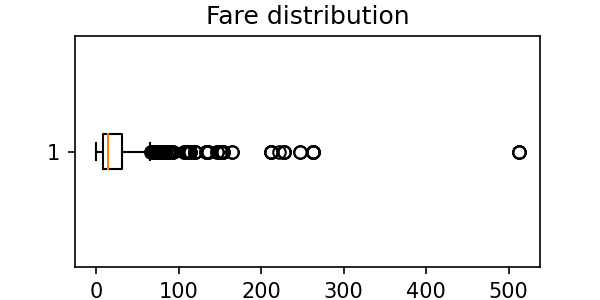

In [21]:
plt.figure(figsize=(4,2))
plt.title('Fare distribution')
plt.boxplot(df['Fare'], vert=False)
plt.show()

In [22]:
#In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data-
#through their quartiles. Box plots may also have lines extending from the boxes indicating variability outside-
#the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram

### Multivariate Analysis

In [24]:
survived = df[df['Survived']==1]['Sex'].value_counts()
survived

female    233
male      109
Name: Sex, dtype: int64

In [26]:
not_survived = df[df['Survived']==0]['Sex'].value_counts()
not_survived

male      468
female     81
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


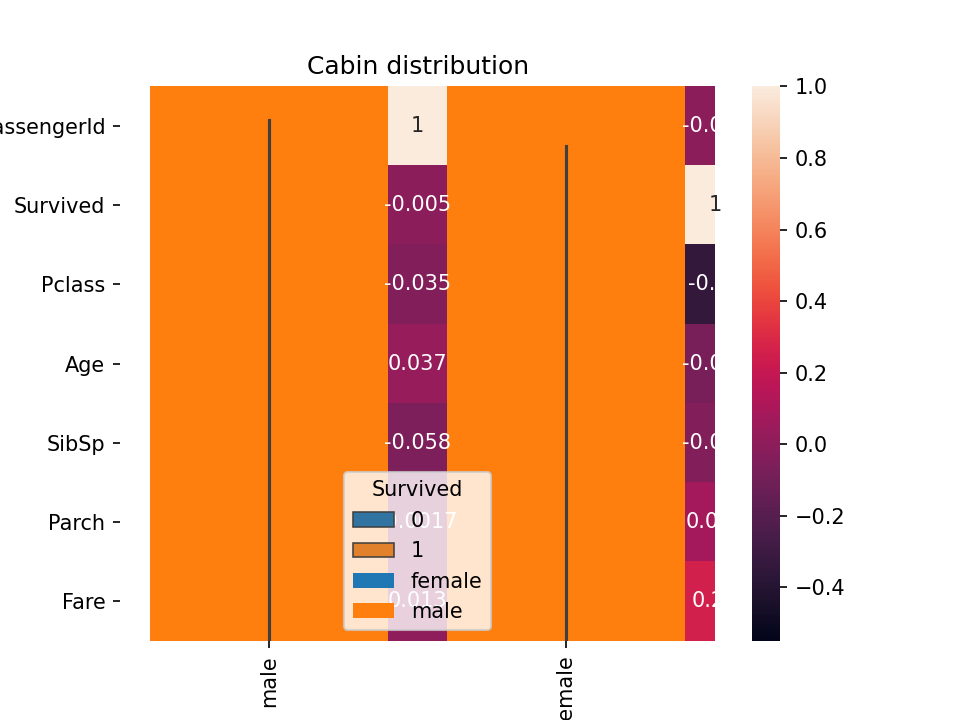

<AxesSubplot:>

In [29]:
bivariate_df = pd.DataFrame(data=[survived, not_survived])
bivariate_df.index=['Survived','Not Survived']
bivariate_df.plot(kind='bar',stacked=True,fig=(21,8))

In [30]:
sns.scatterplot(data=df, x='Fare', y='Pclass')

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

## Multivariate analysis

One can find correlations using pandas `.corr()` function and can visualize the correlation matrix using a heatmap in seaborn.

* `.corr()`  
find correlations between variables  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [33]:
corr_df = df.corr()
corr_df

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [35]:
sns.heatmap(corr_df, annot=True)

<AxesSubplot:>

In [36]:
# Violinplot Displays distribution of data across all levels of a category. 
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = df, split = True) 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

### Creating new features

In [37]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [38]:
cabins = df['Cabin'].dropna()
cabins = cabins.apply(lambda x: x[0])
cabins

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: Cabin, Length: 204, dtype: object

In [39]:
cabins_count = cabins.value_counts()
cabins_count

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [40]:
plt.title('Cabin distribution')
plt.bar(cabins_count.index, cabins_count.values)
plt.show()

In [41]:
!pip install pandas-profiling

  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107420 sha256=37686153a3d677055d67ff206809c8c9a20515a70ebcfc7e5cea4beca85df7ff
  Stored in directory: c:\users\kisszabo\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=f40b0c129beca6f0229e9559054924ff4e6782d24ee0762751a4d6eaf0d56c22
  Stored in directory: c:\users\kisszabo\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built phik htmlmin


<IPython.core.display.Javascript object>


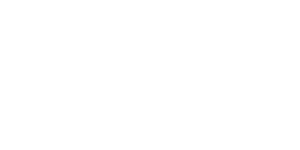

<IPython.core.display.Javascript object>


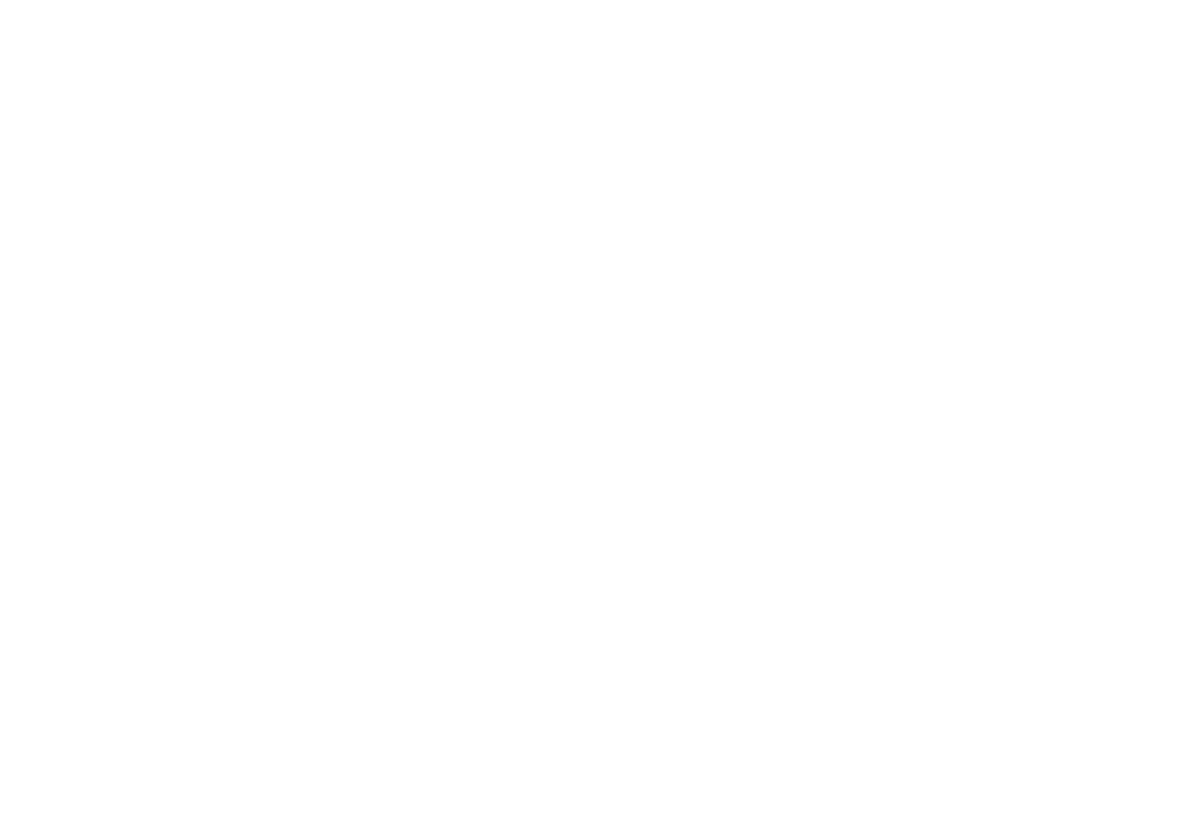

<IPython.core.display.Javascript object>


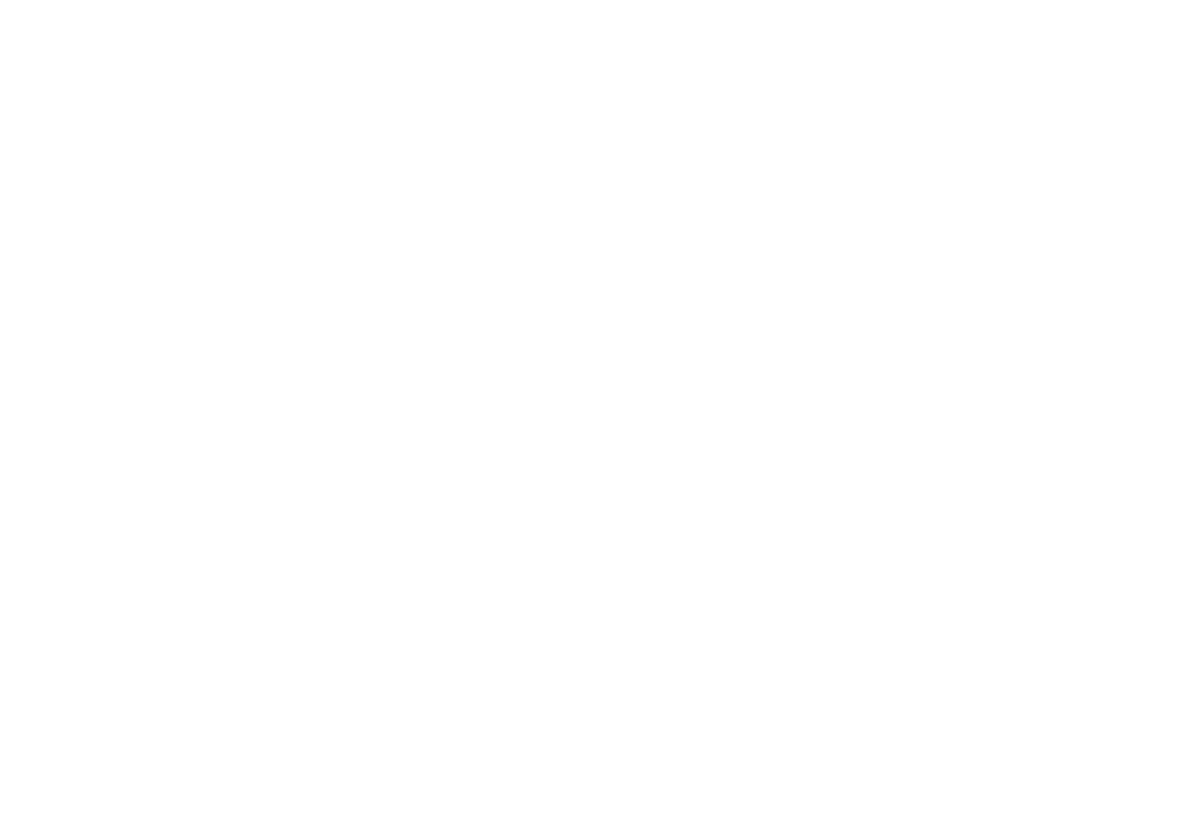

<IPython.core.display.Javascript object>


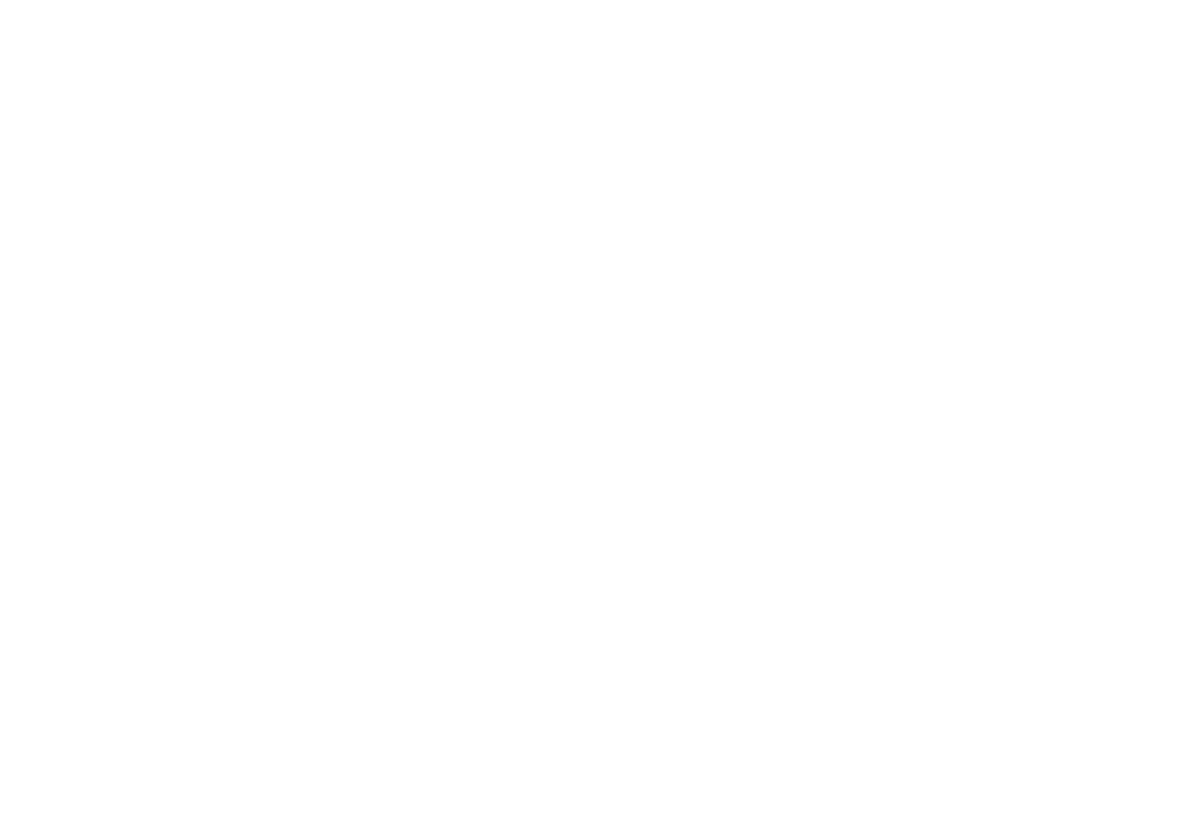

<IPython.core.display.Javascript object>


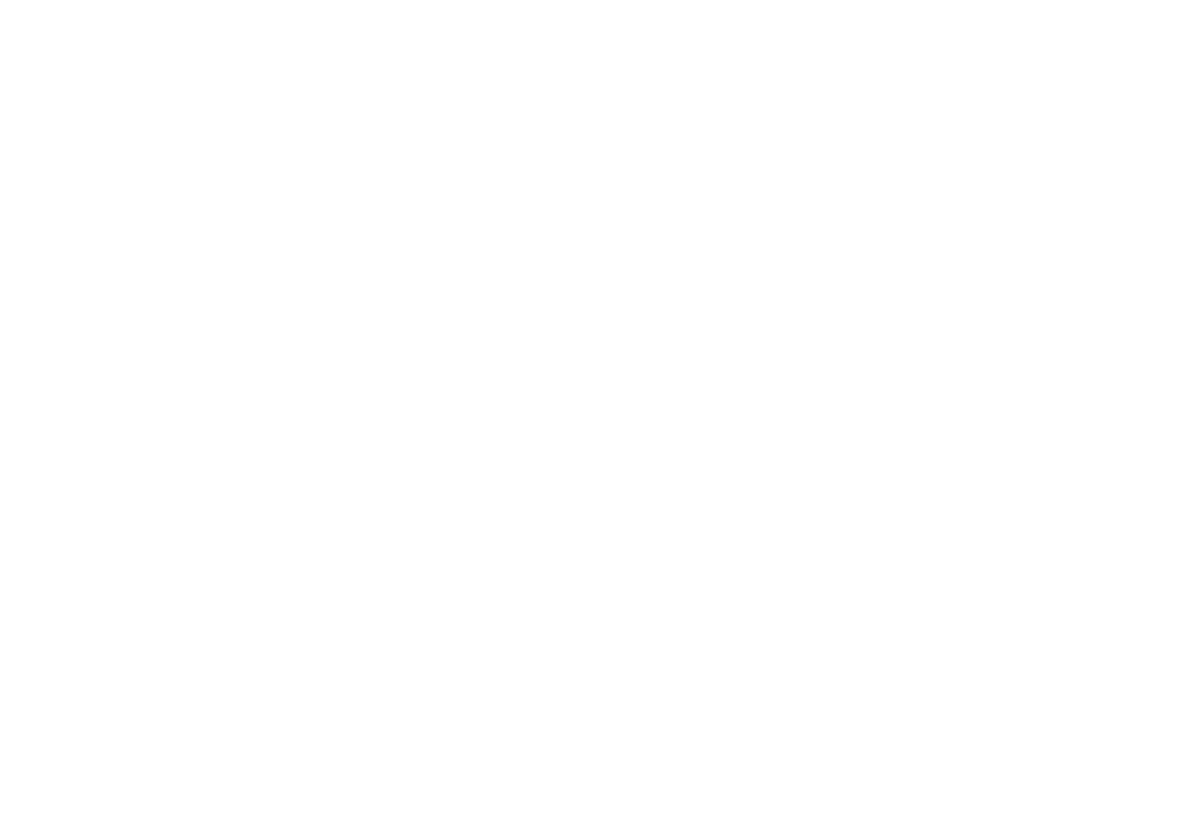

<IPython.core.display.Javascript object>


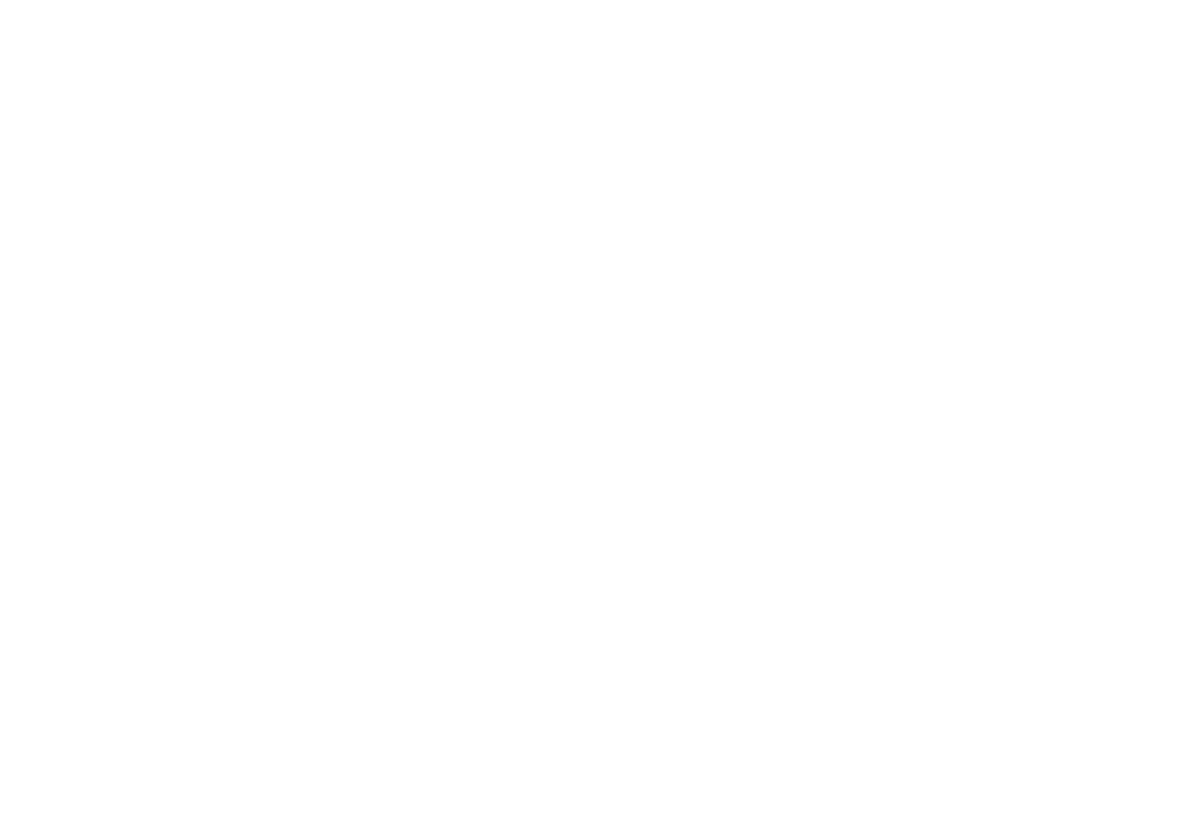

<IPython.core.display.Javascript object>


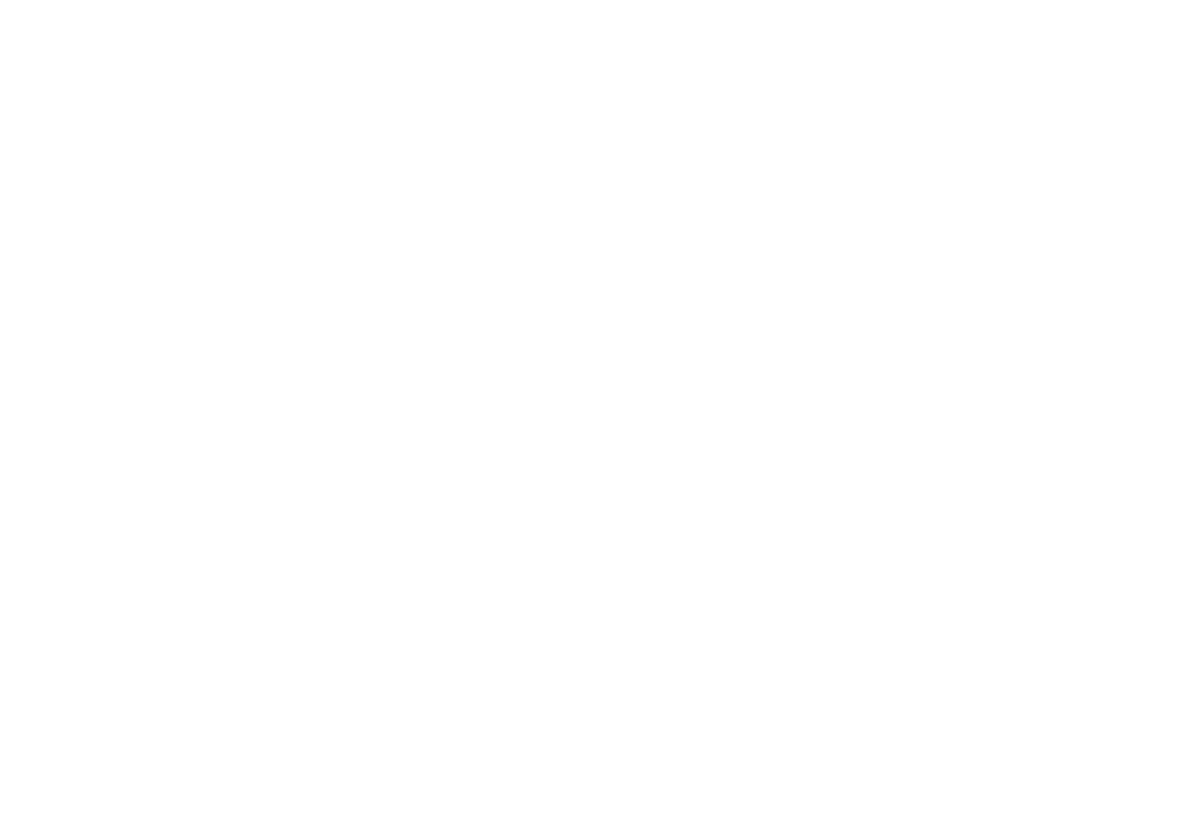

<IPython.core.display.Javascript object>


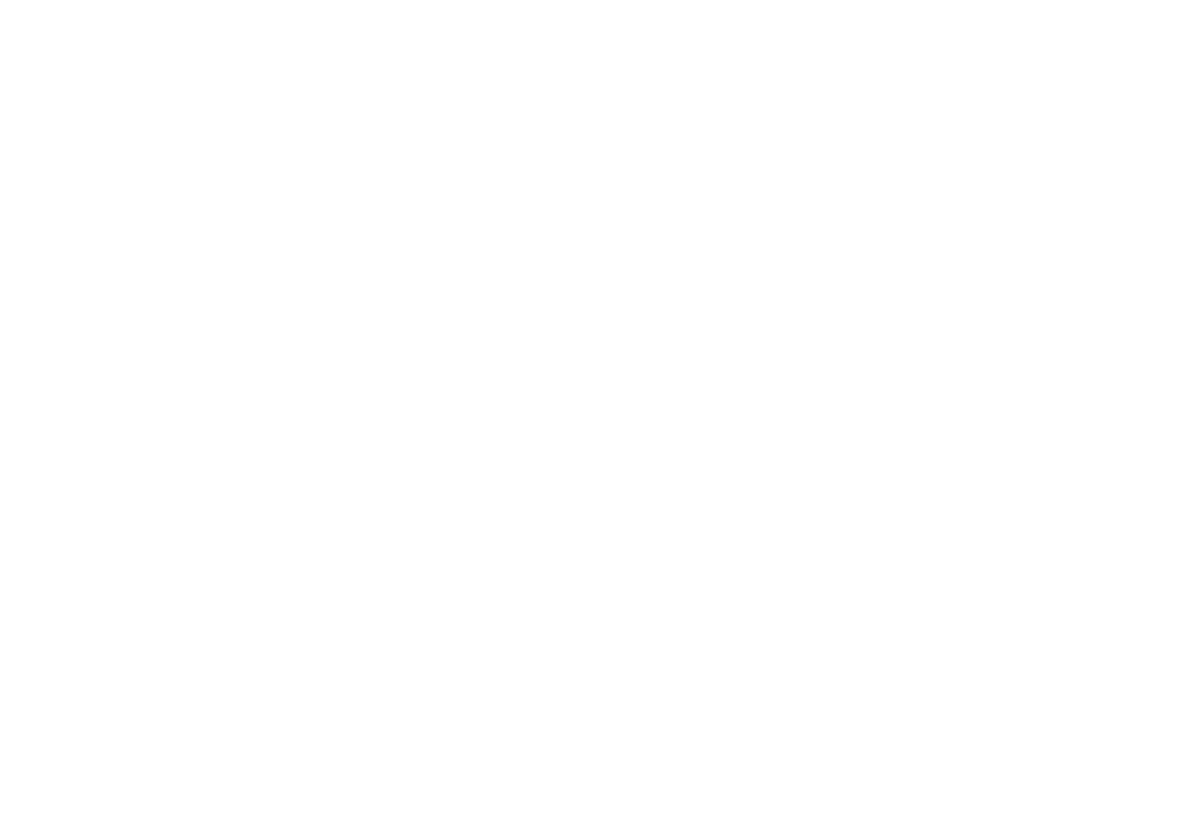

<IPython.core.display.Javascript object>


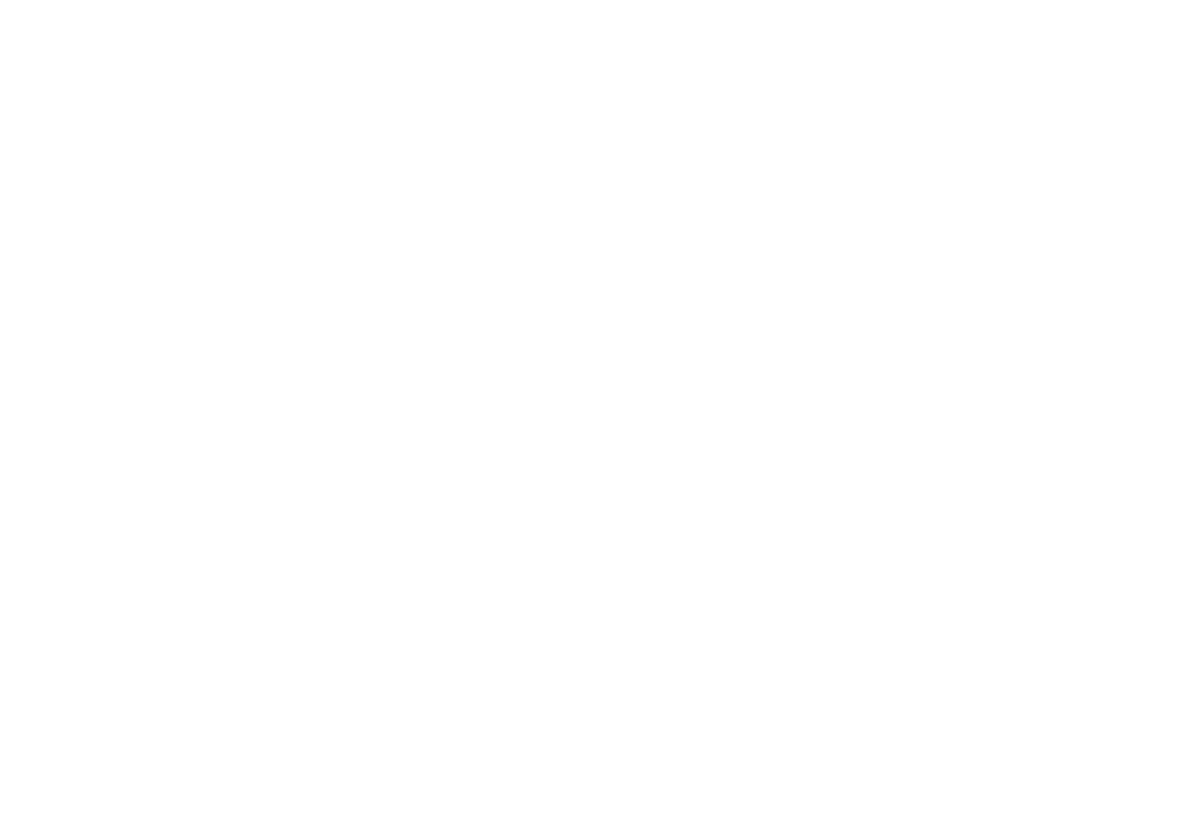

<IPython.core.display.Javascript object>


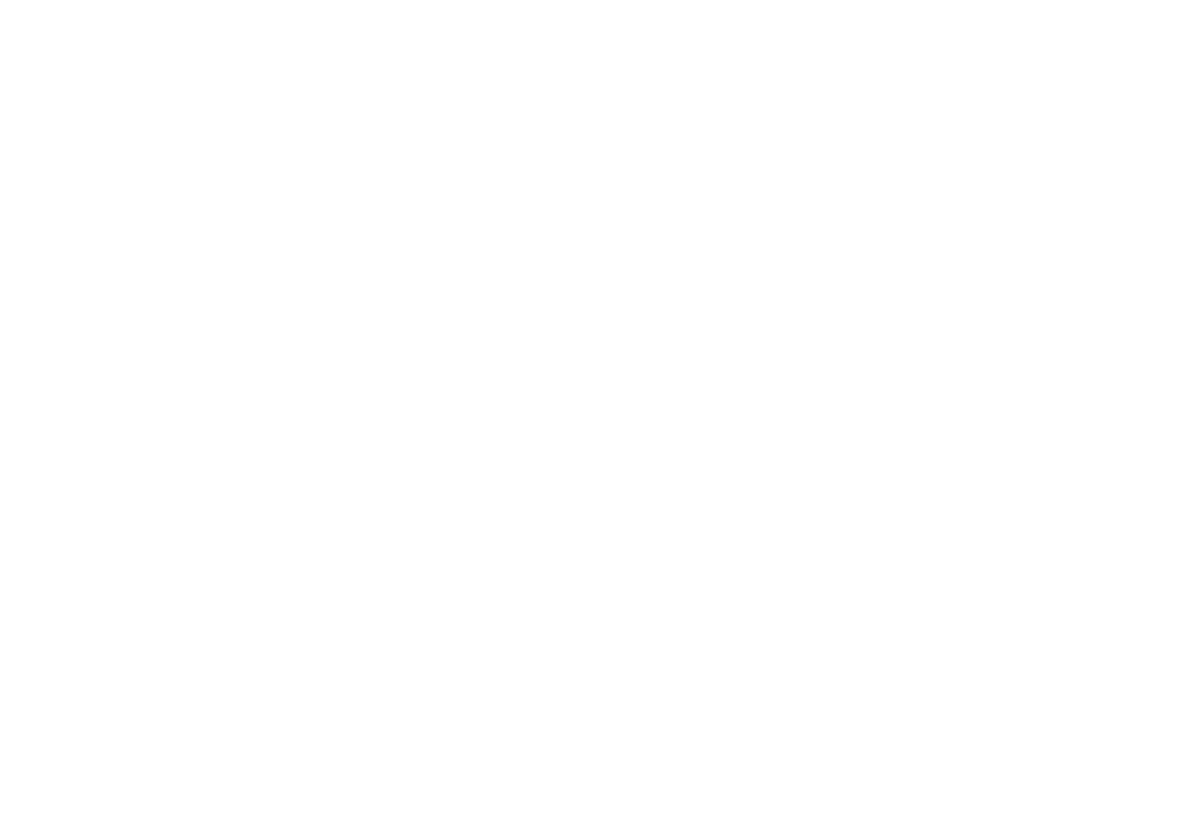

<IPython.core.display.Javascript object>


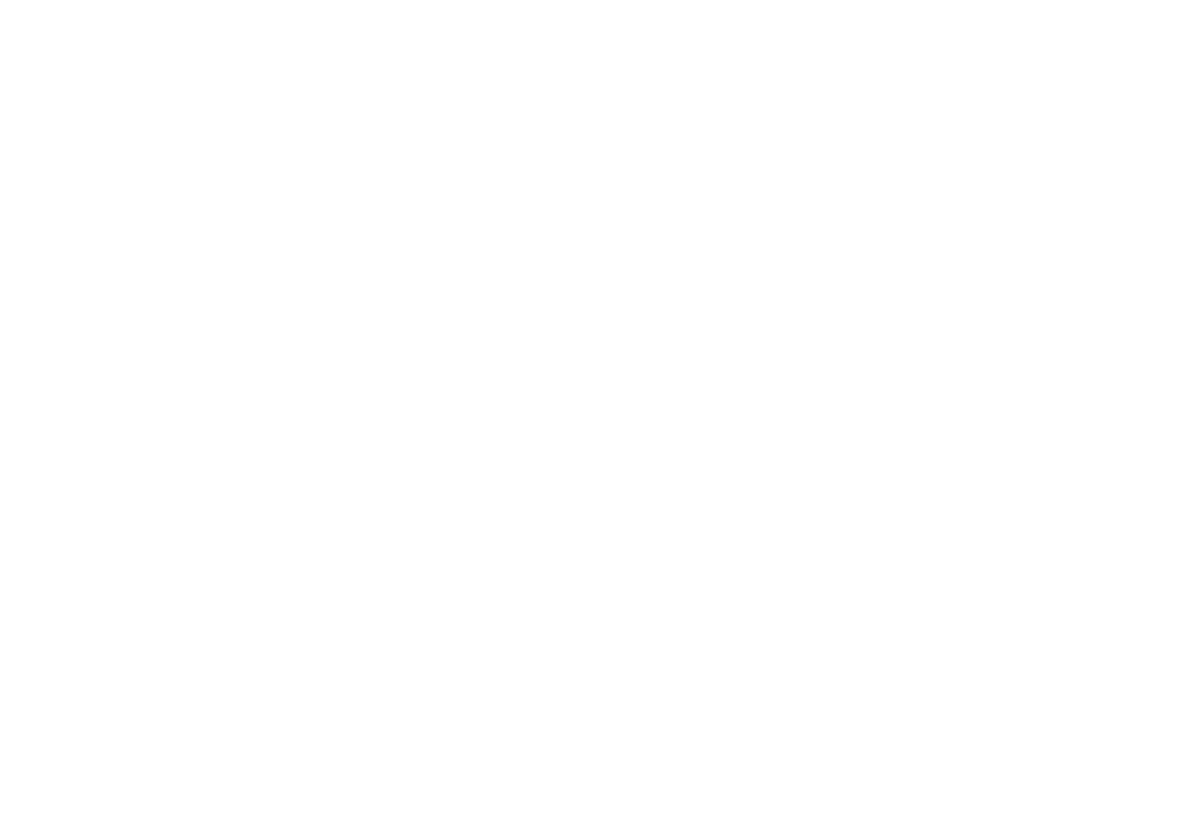

<IPython.core.display.Javascript object>


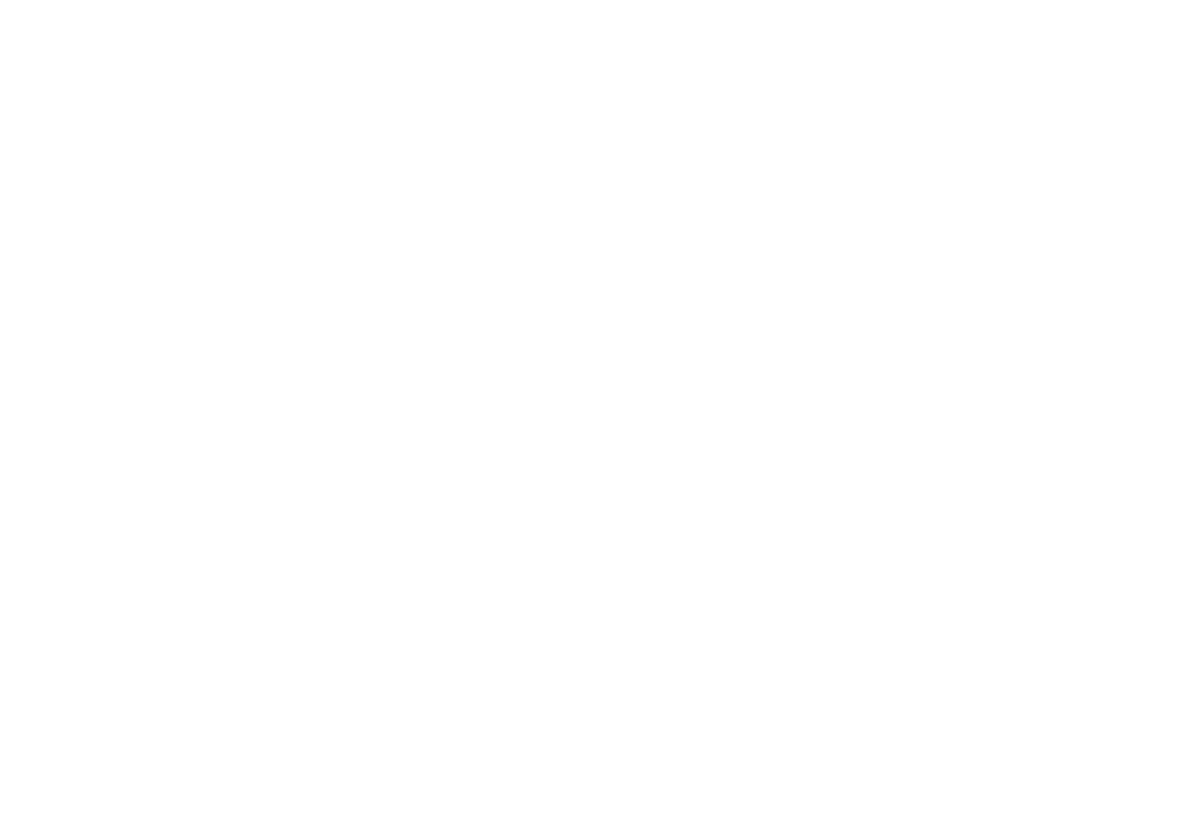

<IPython.core.display.Javascript object>


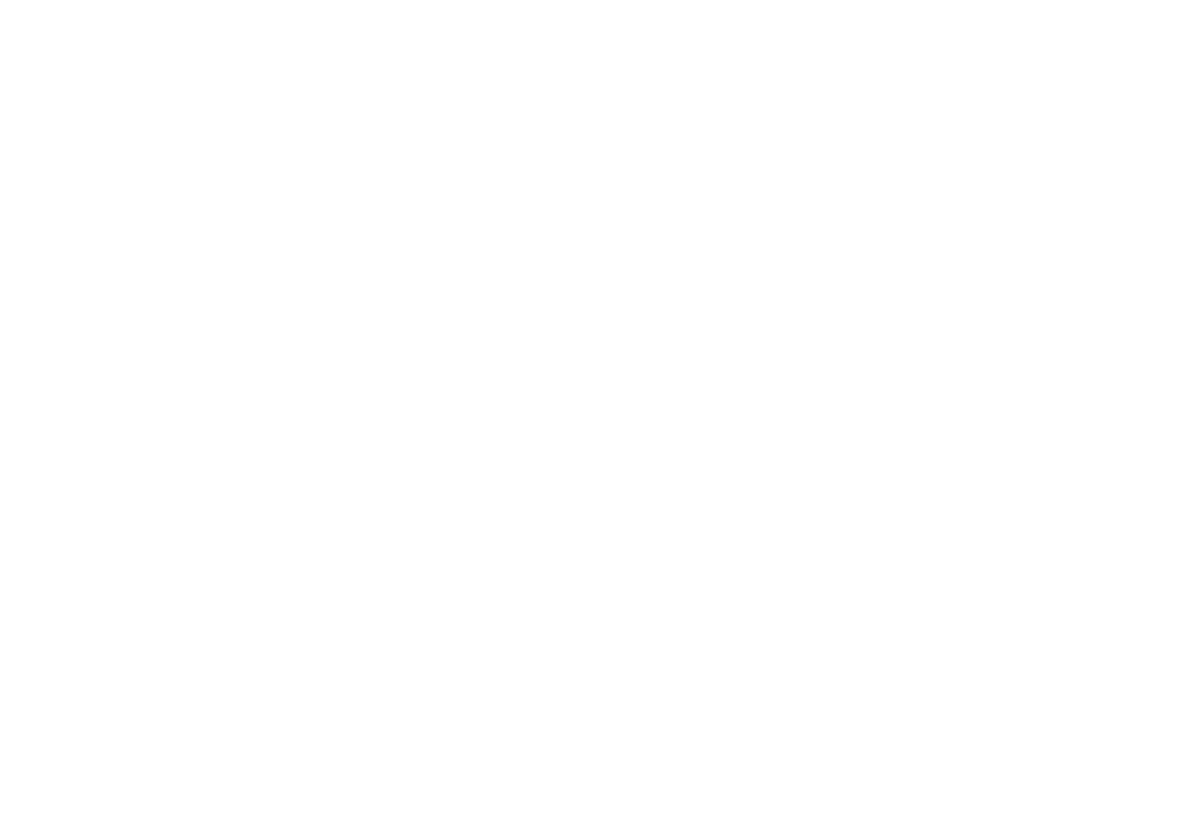

<IPython.core.display.Javascript object>


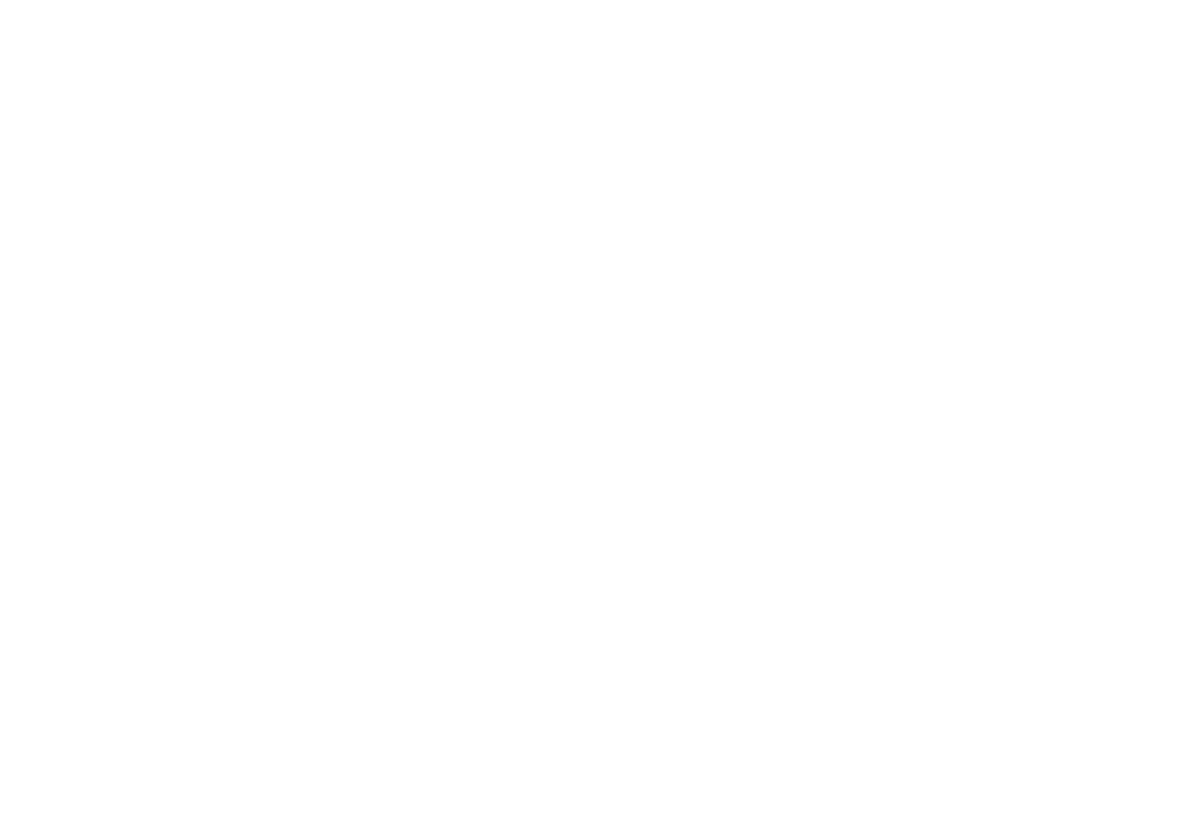

<IPython.core.display.Javascript object>


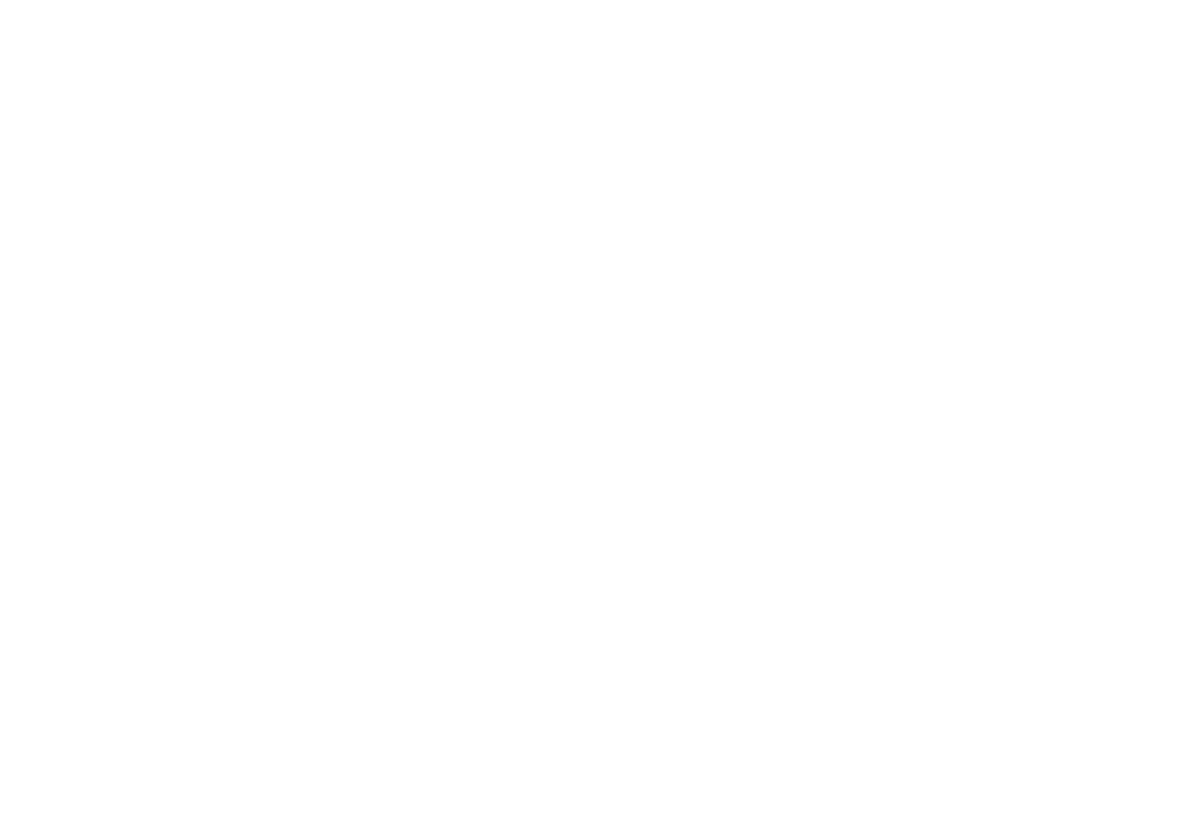

<IPython.core.display.Javascript object>


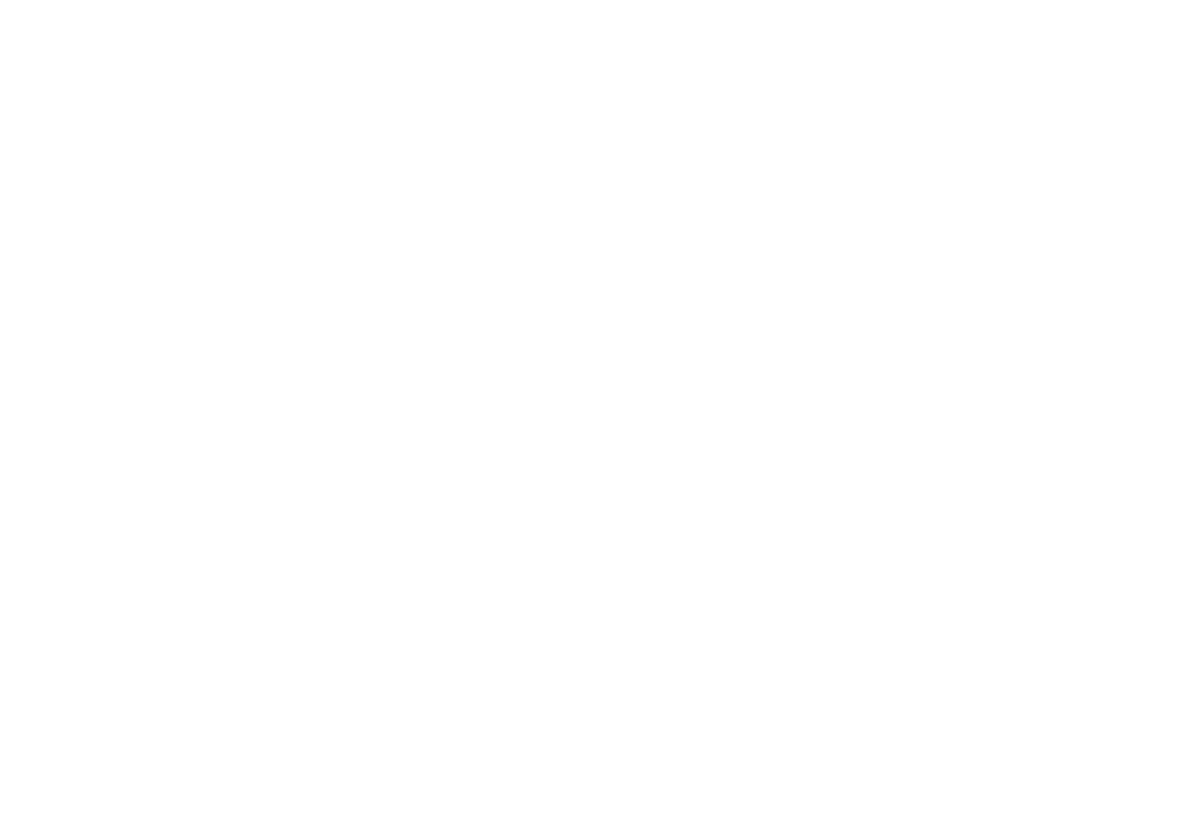

<IPython.core.display.Javascript object>


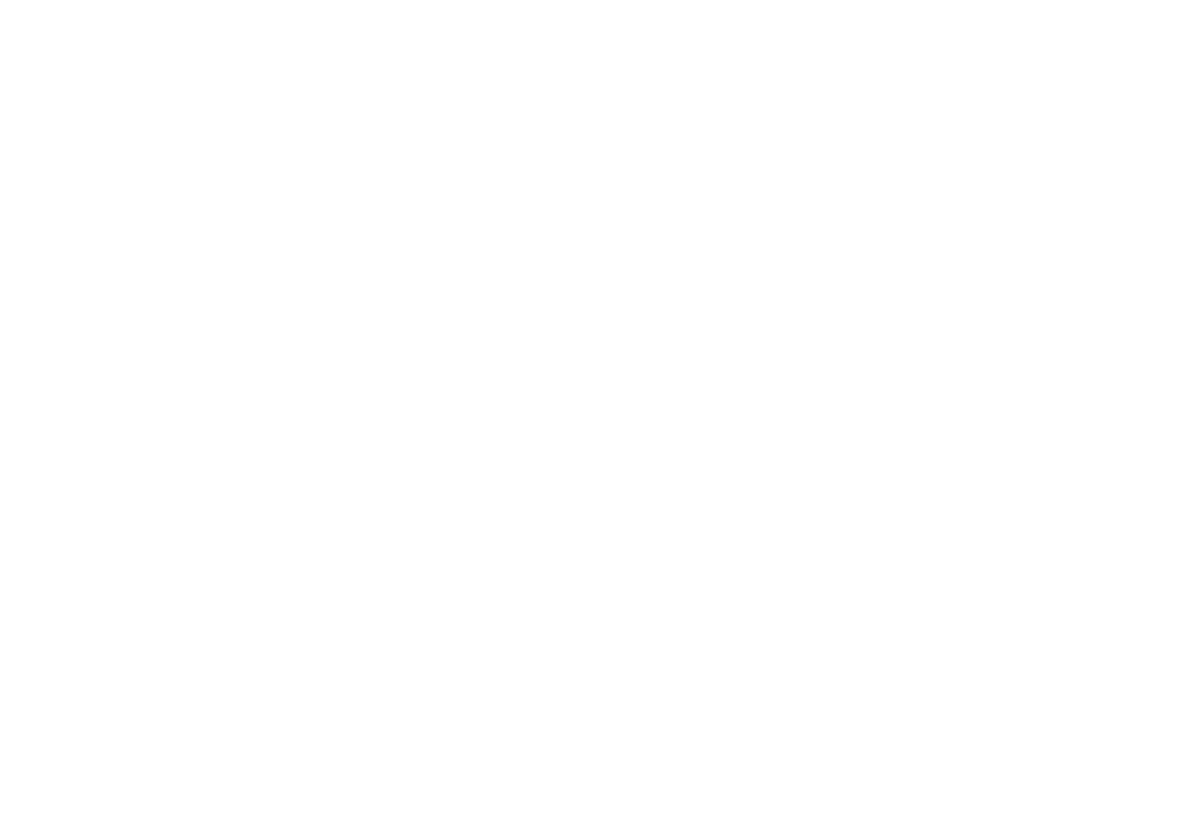

<IPython.core.display.Javascript object>


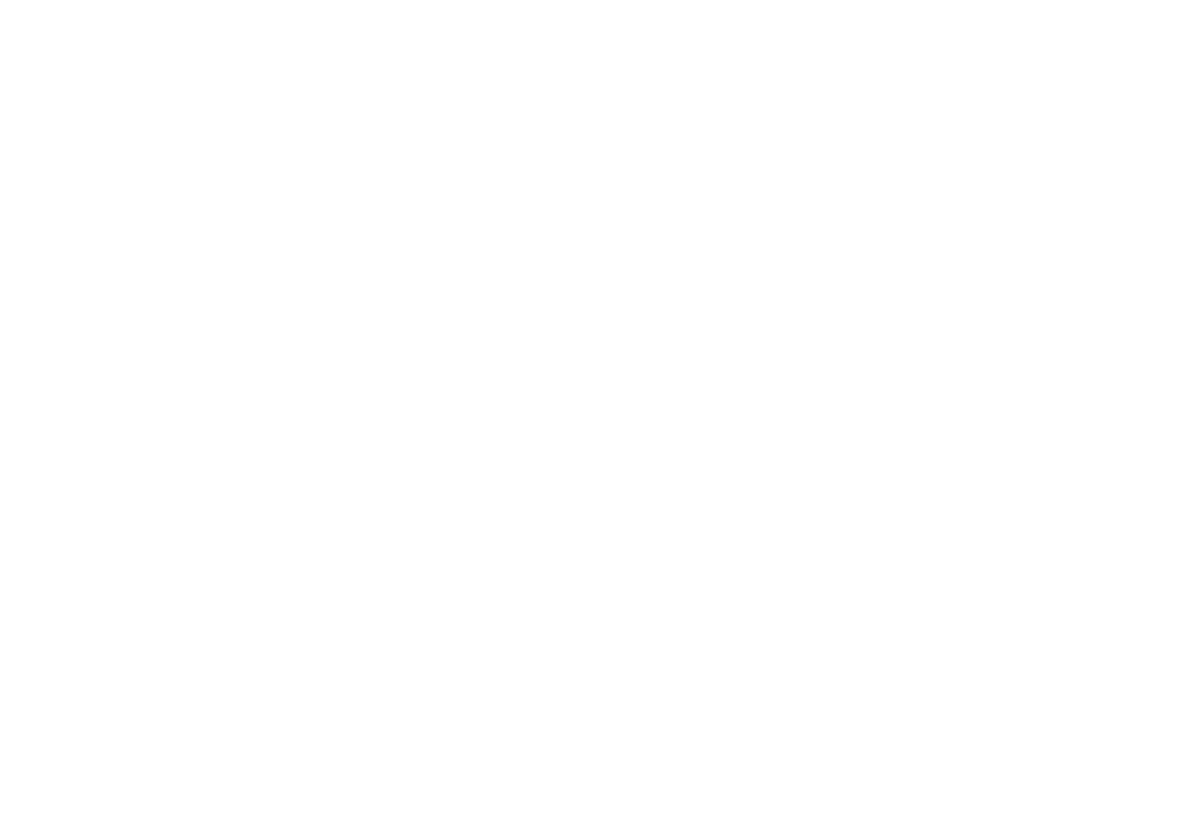

<IPython.core.display.Javascript object>


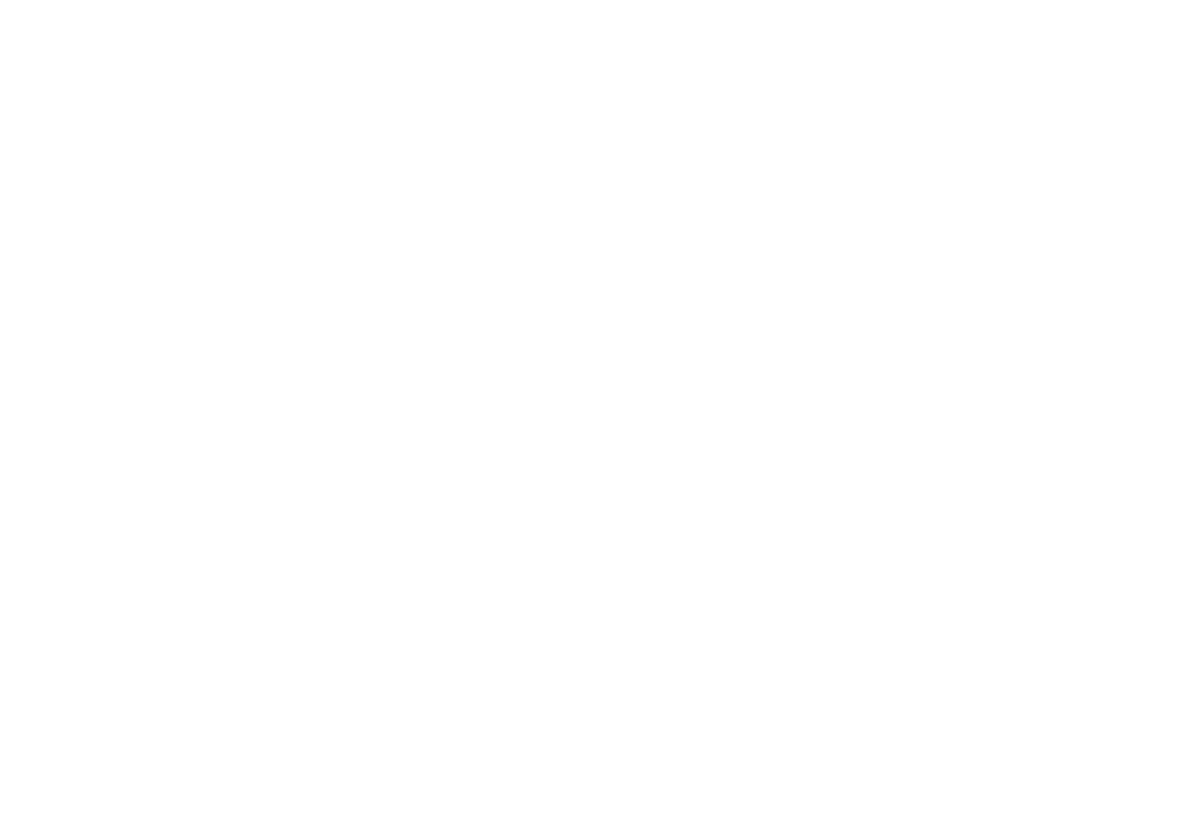

<IPython.core.display.Javascript object>


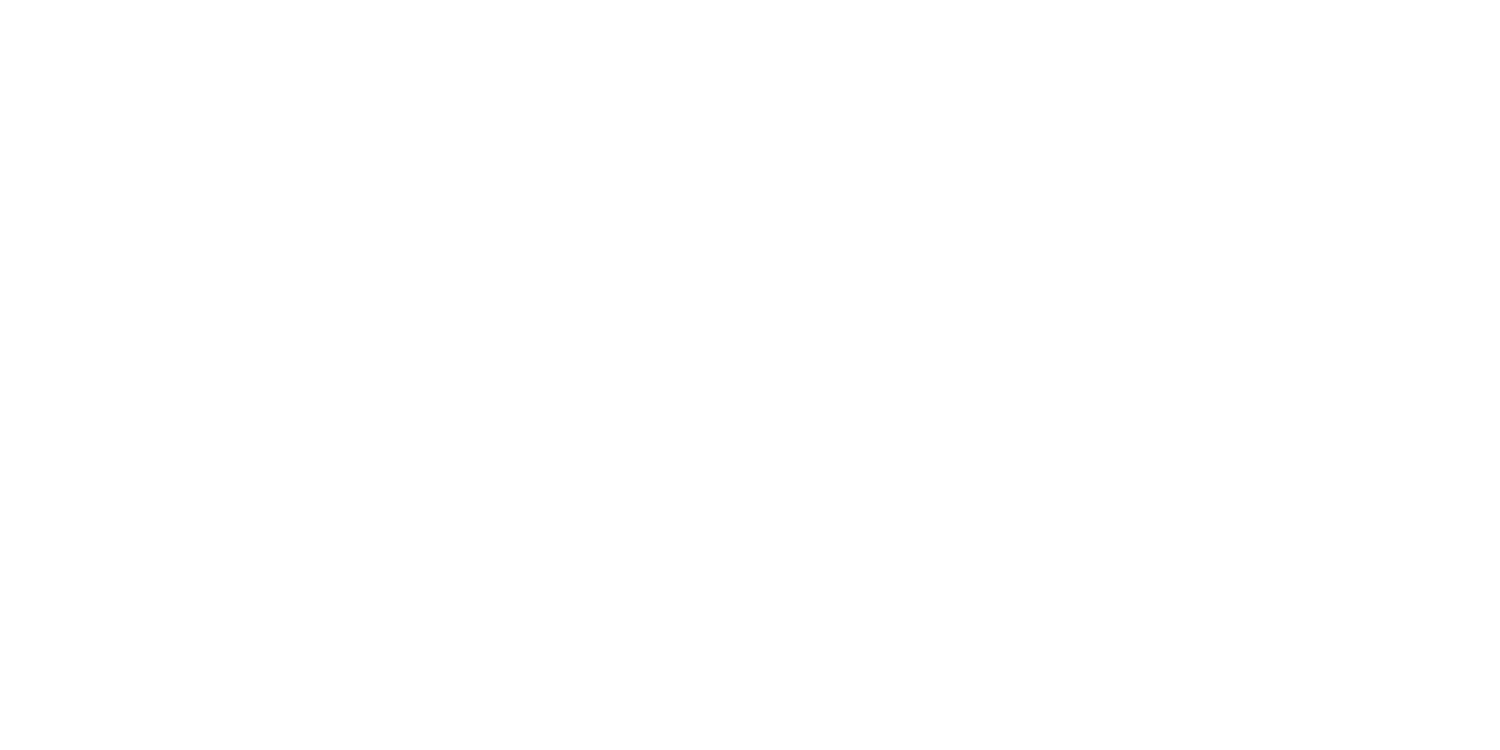

<IPython.core.display.Javascript object>


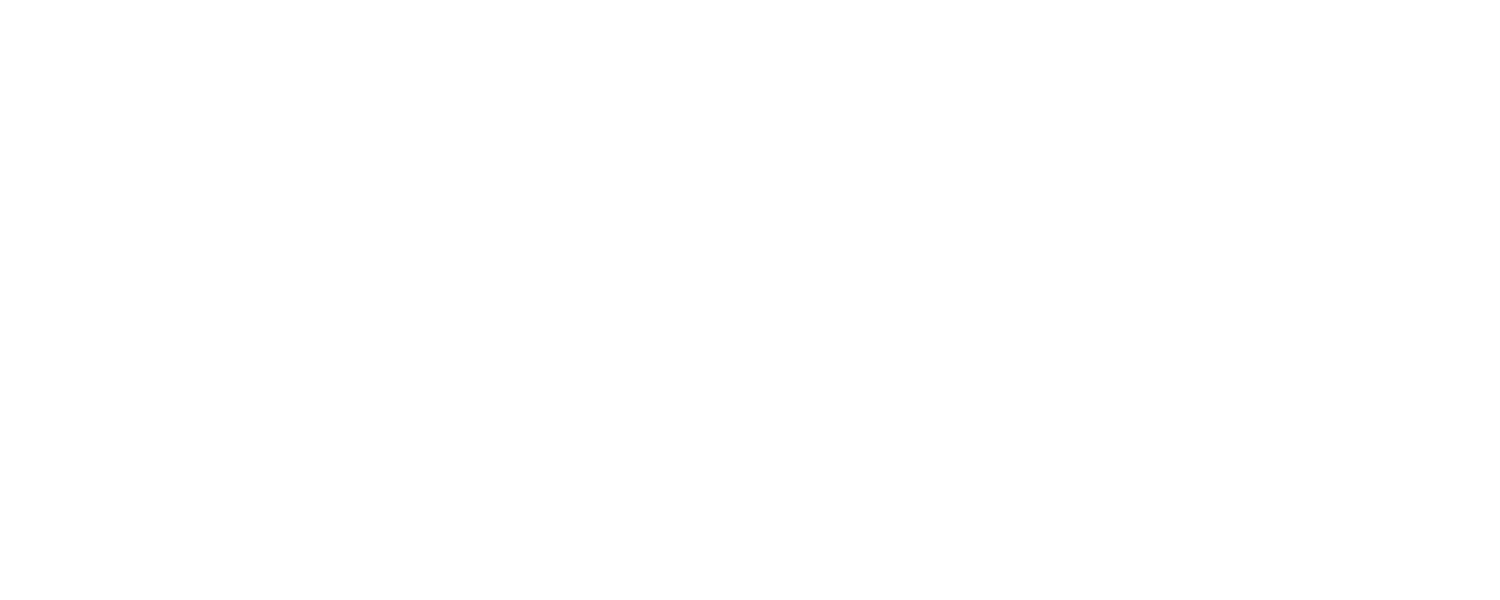

<IPython.core.display.Javascript object>


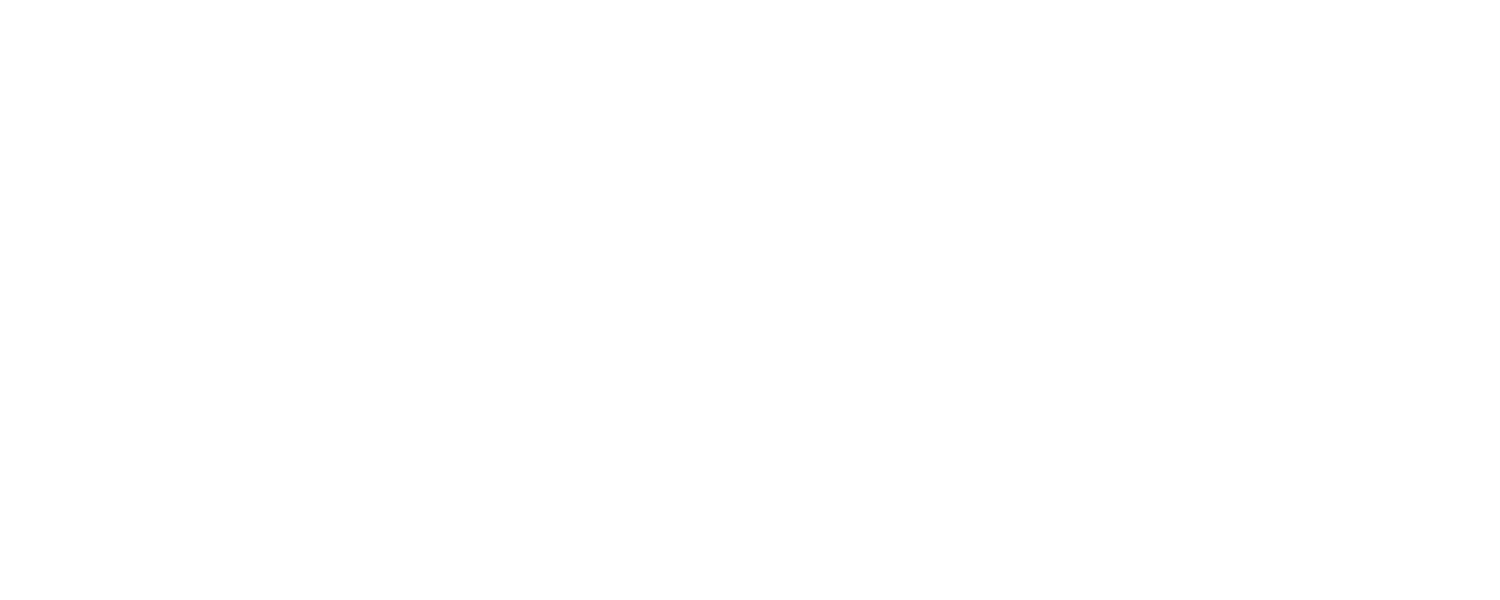

<IPython.core.display.Javascript object>


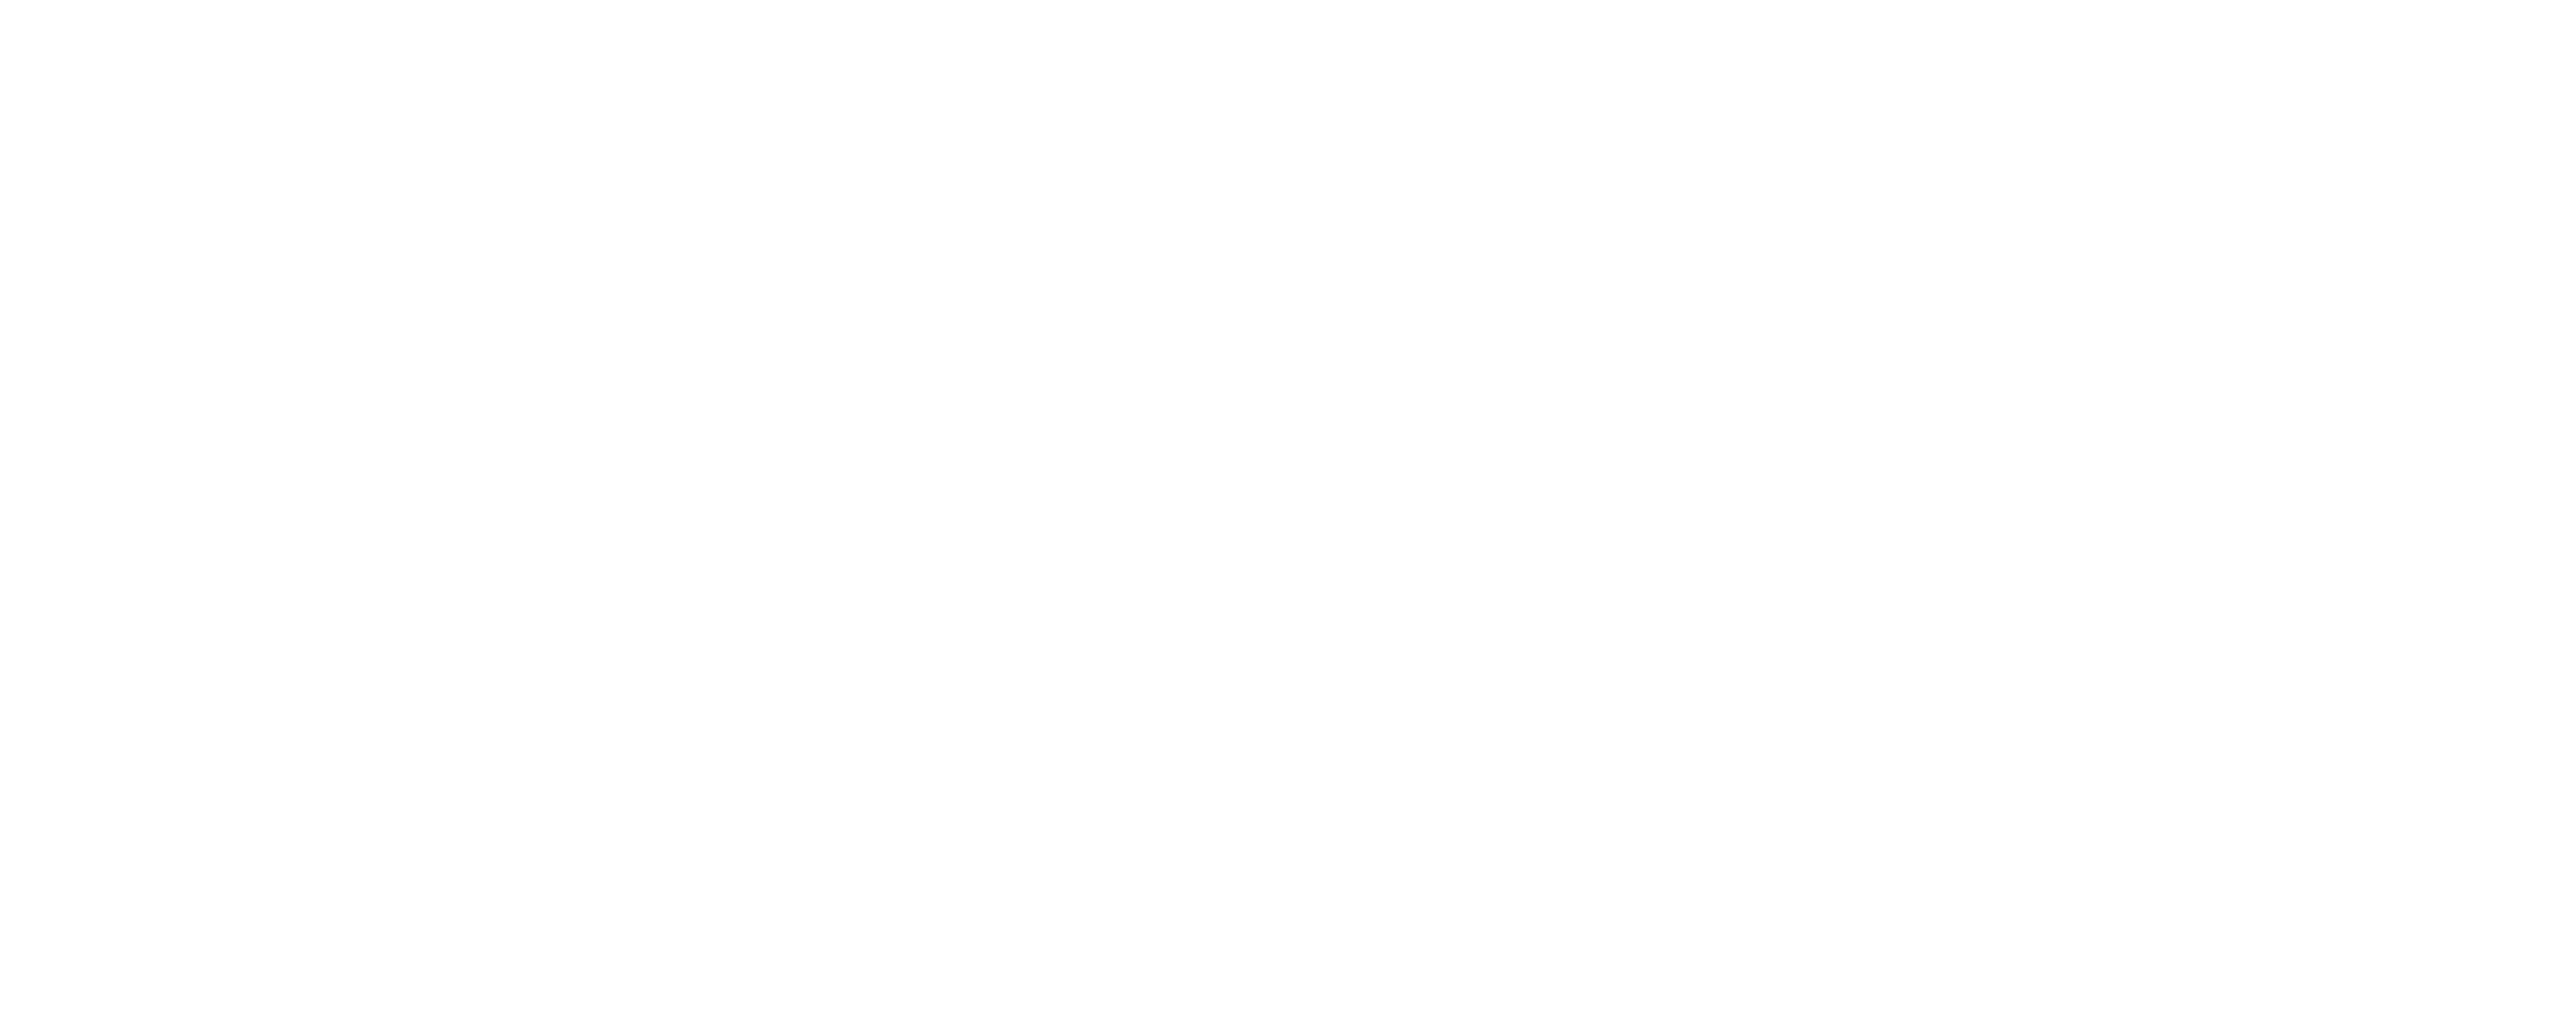

<IPython.core.display.Javascript object>


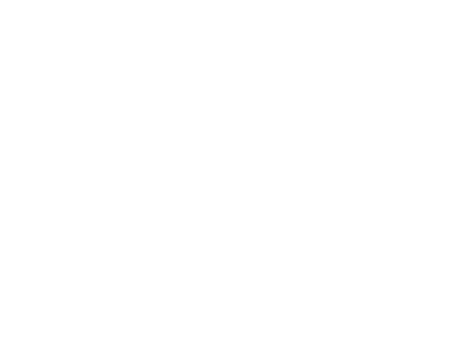

<IPython.core.display.Javascript object>


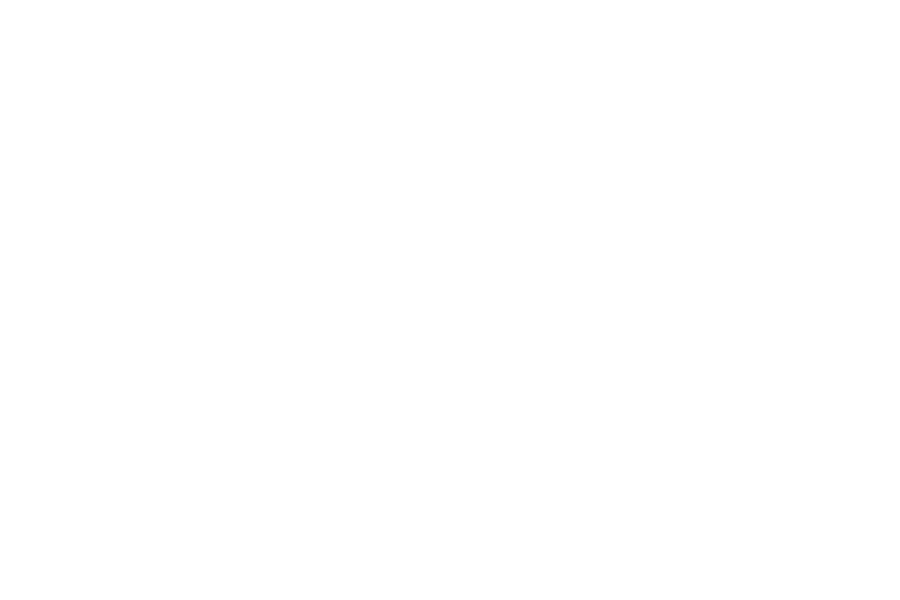

<IPython.core.display.Javascript object>


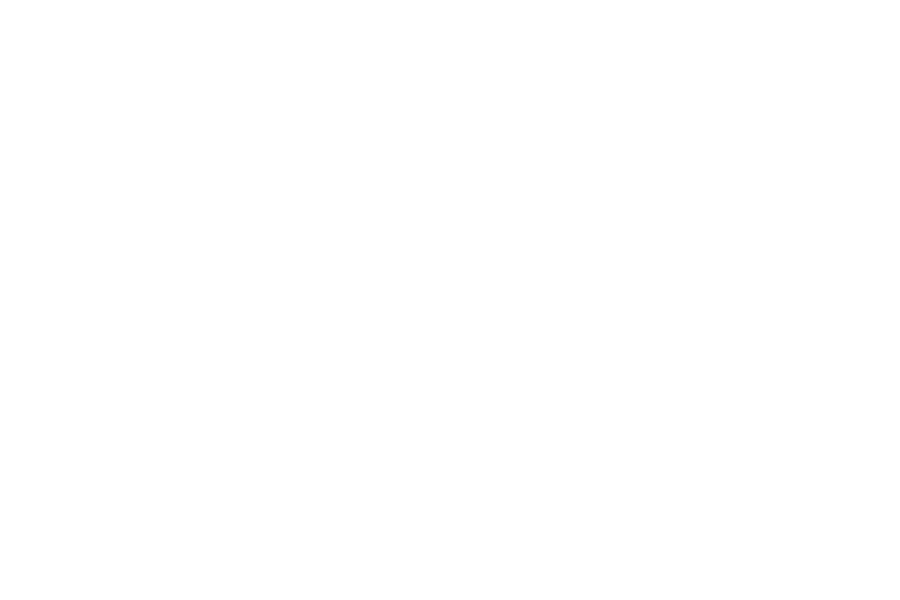

<IPython.core.display.Javascript object>


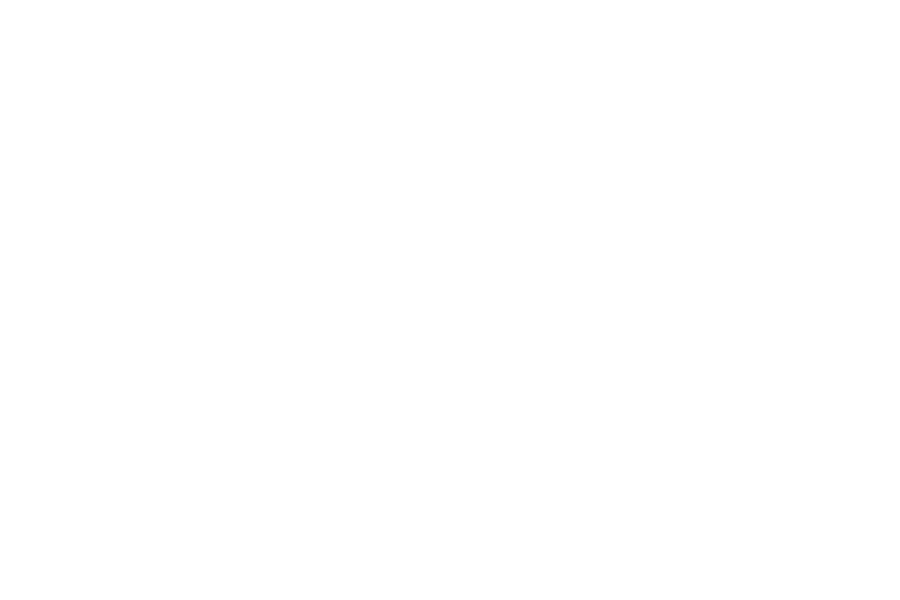

<IPython.core.display.Javascript object>


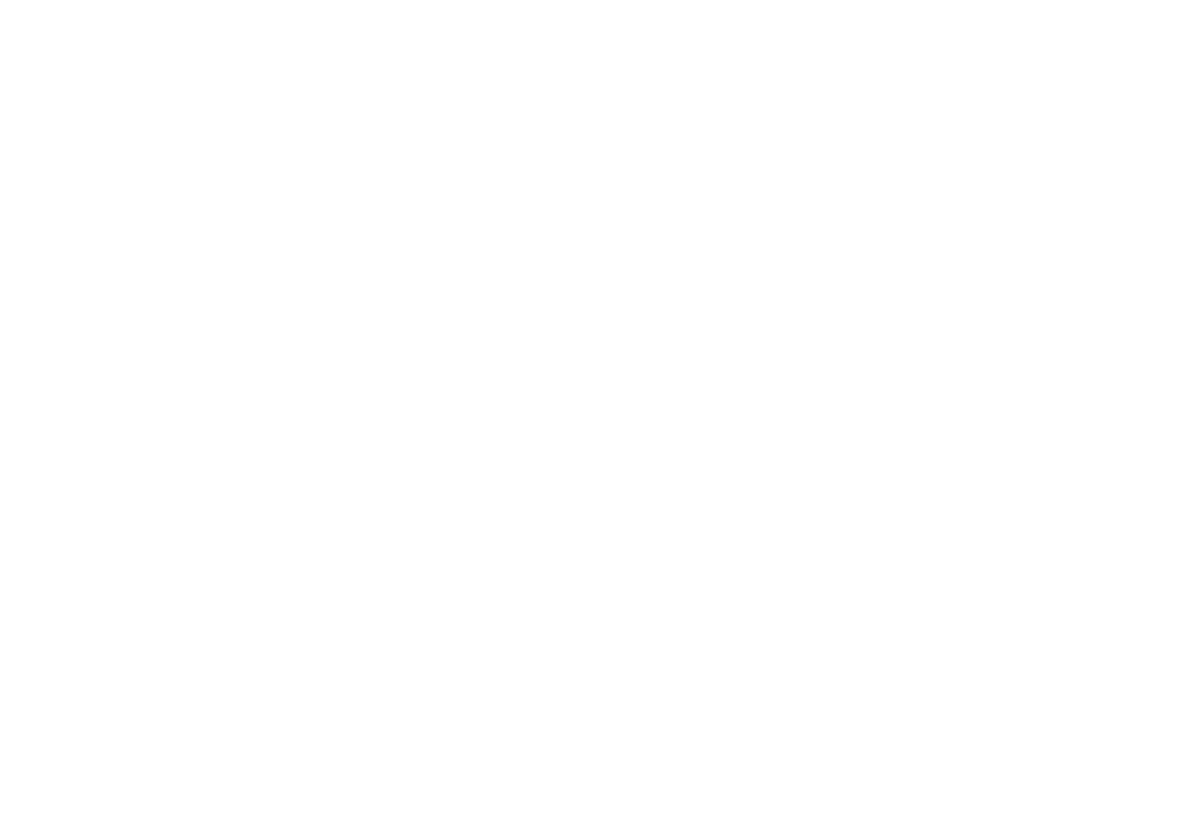

<IPython.core.display.Javascript object>


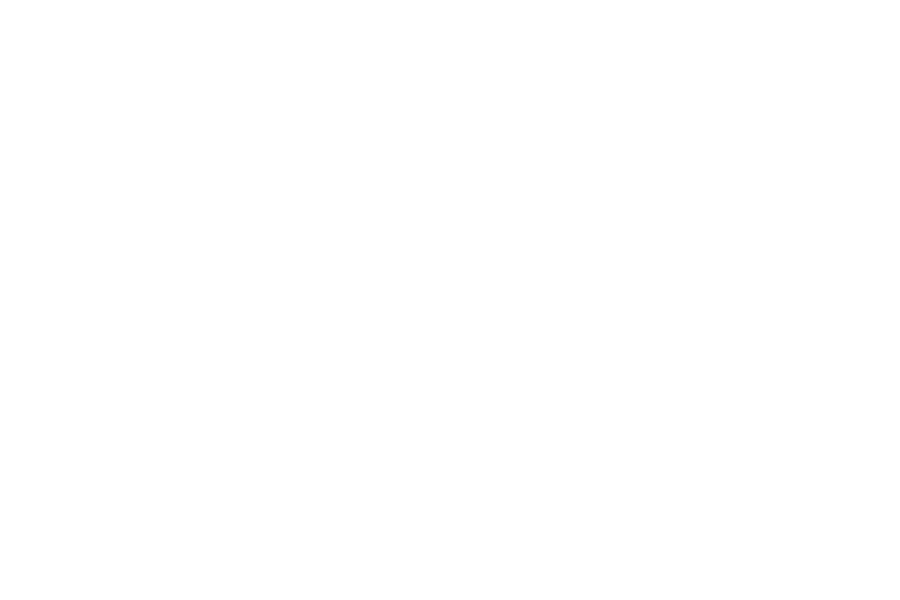

<IPython.core.display.Javascript object>


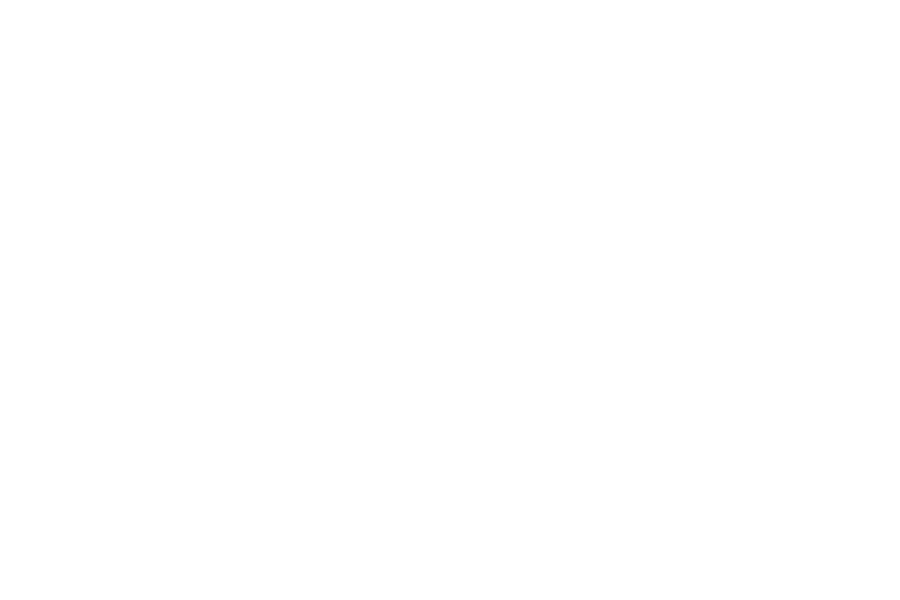

<IPython.core.display.Javascript object>


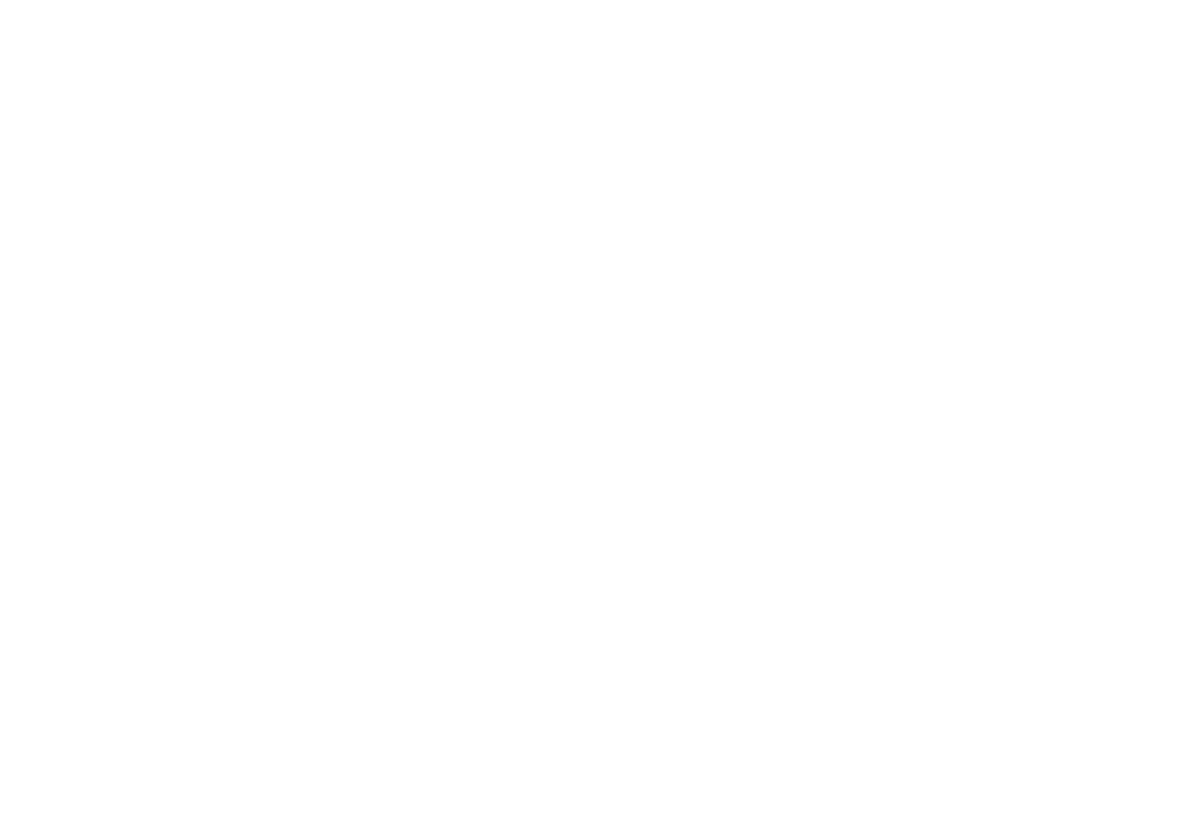

<IPython.core.display.Javascript object>


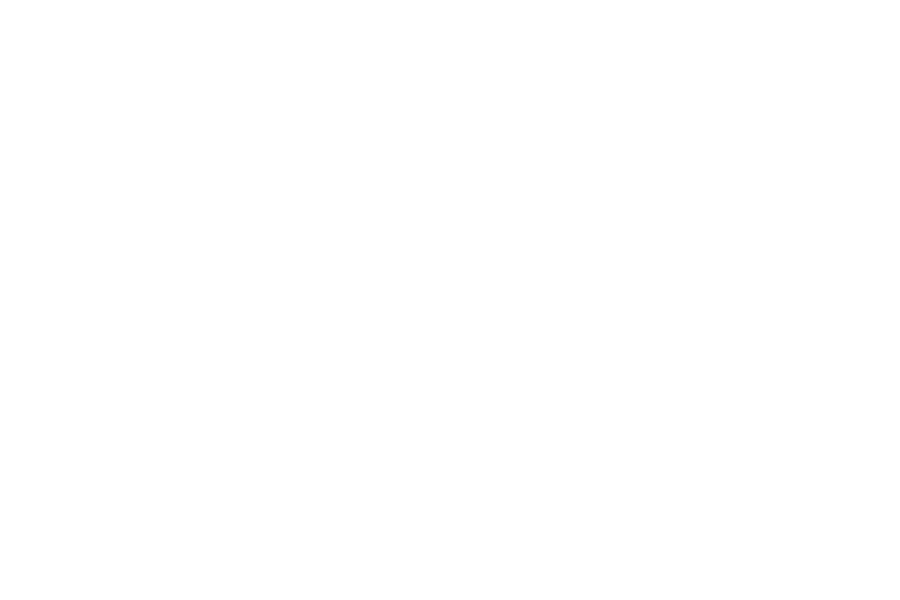

<IPython.core.display.Javascript object>


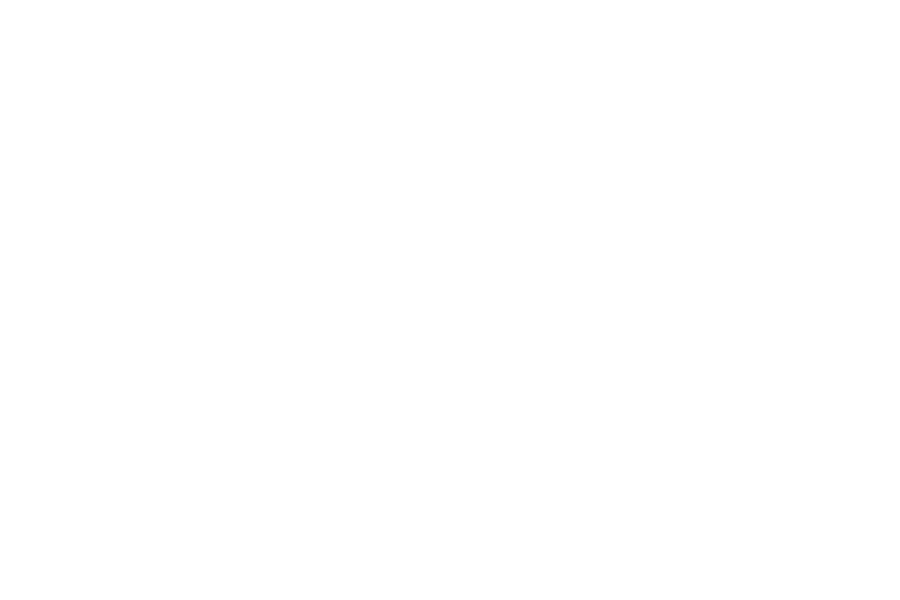

<IPython.core.display.Javascript object>


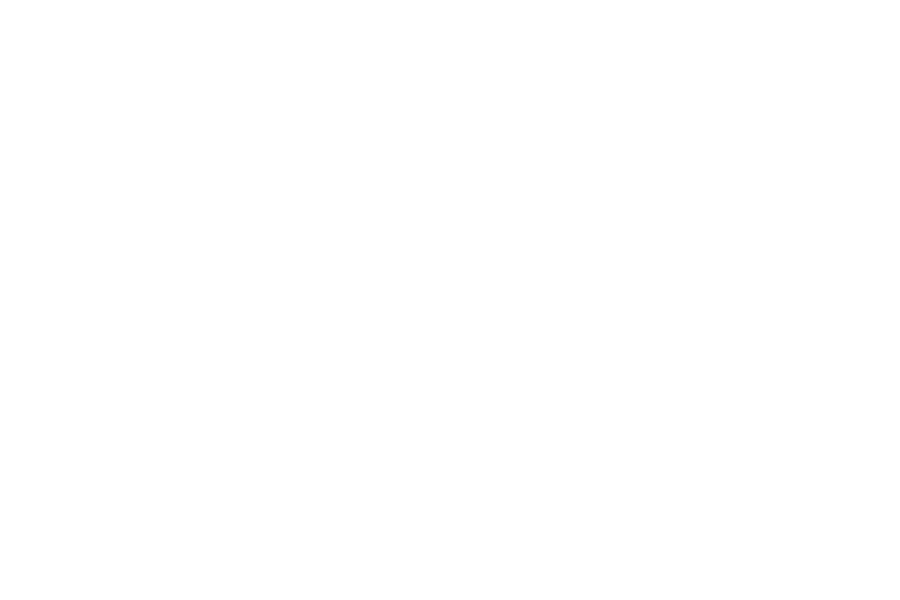

<IPython.core.display.Javascript object>


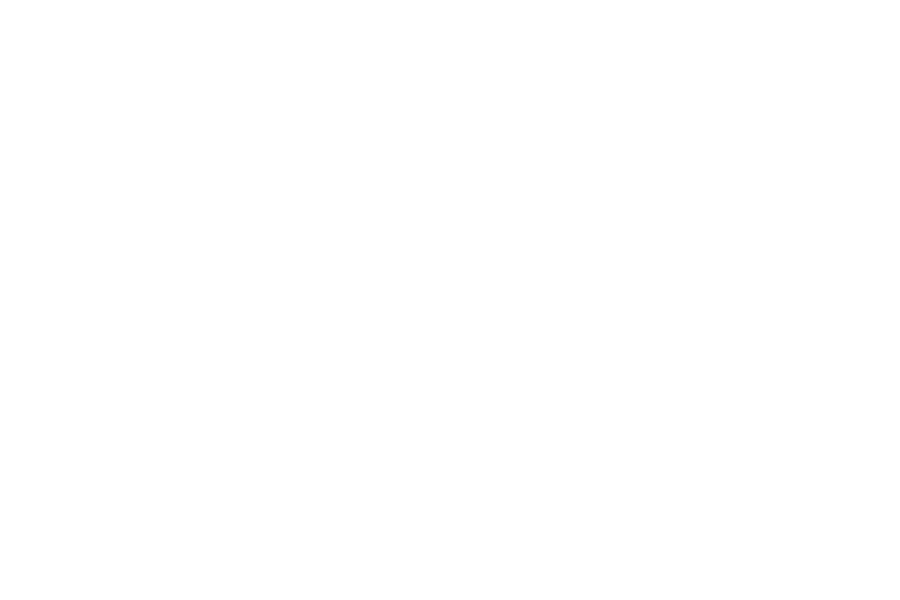

<IPython.core.display.Javascript object>


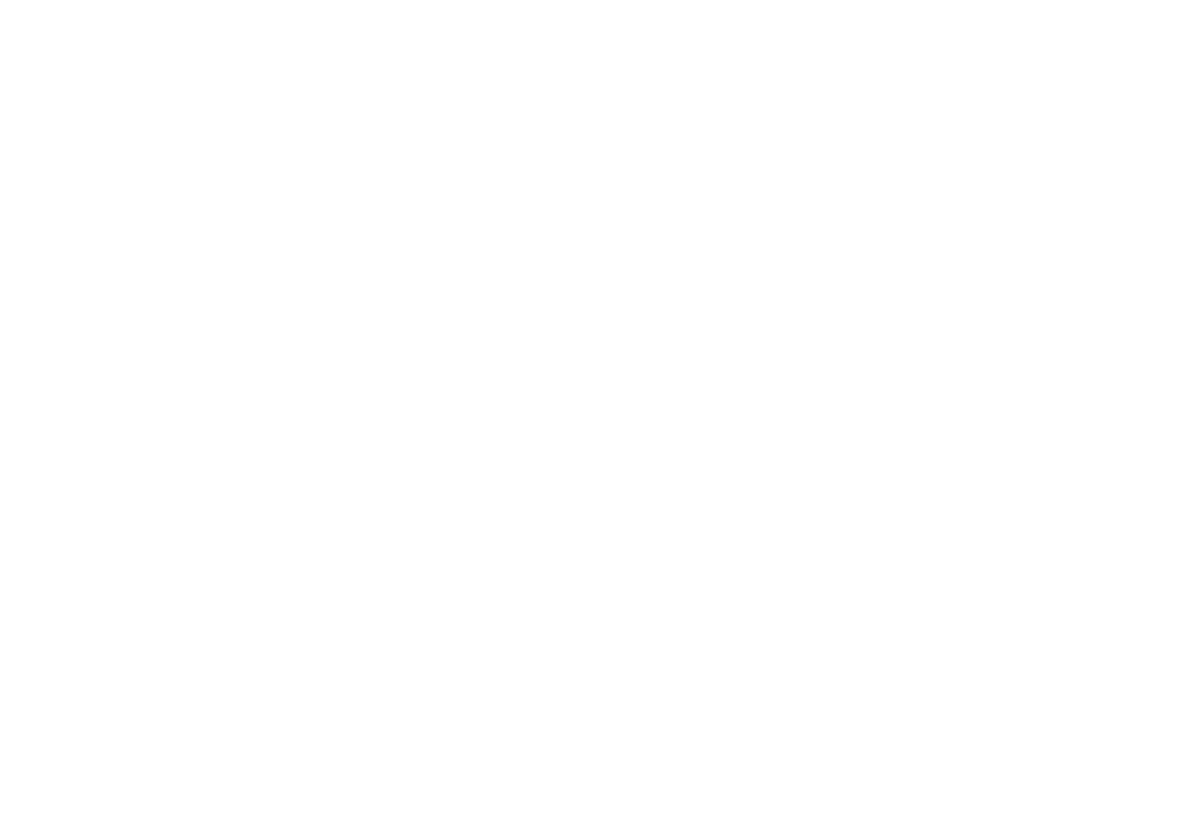

<IPython.core.display.Javascript object>


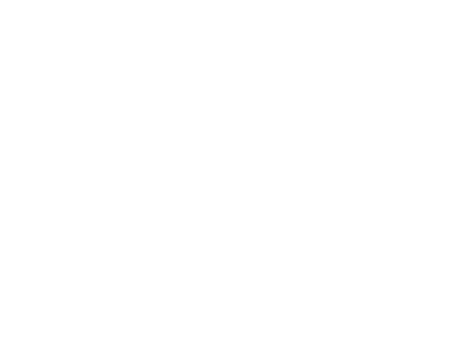

<IPython.core.display.Javascript object>


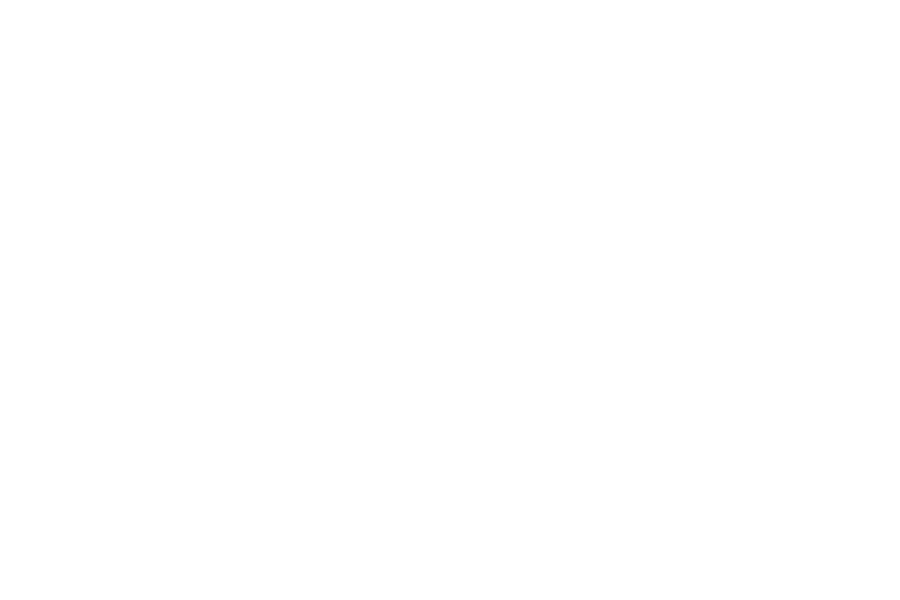

<IPython.core.display.Javascript object>


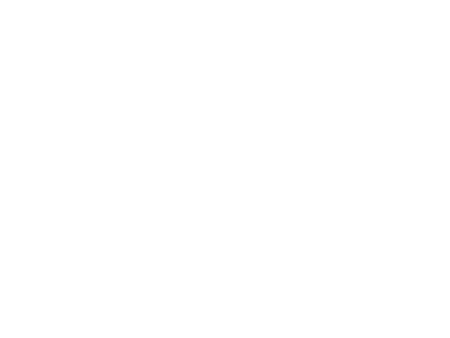

<IPython.core.display.Javascript object>


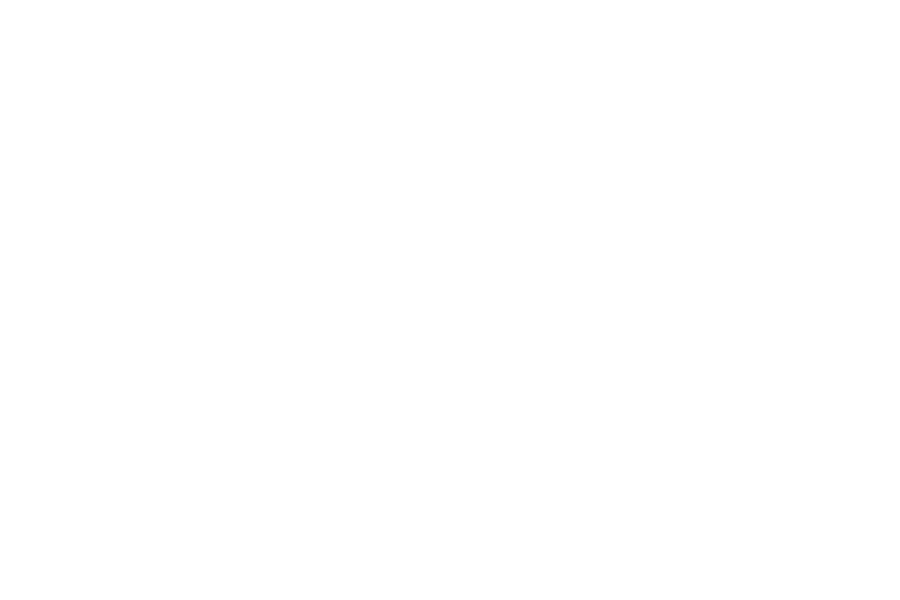

<IPython.core.display.Javascript object>


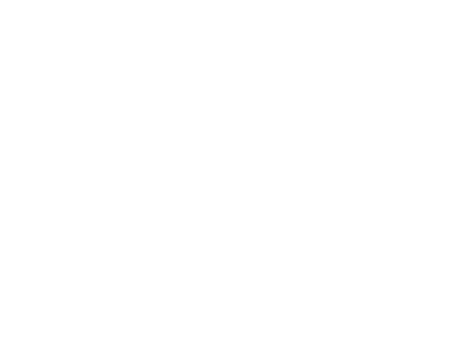

<IPython.core.display.Javascript object>


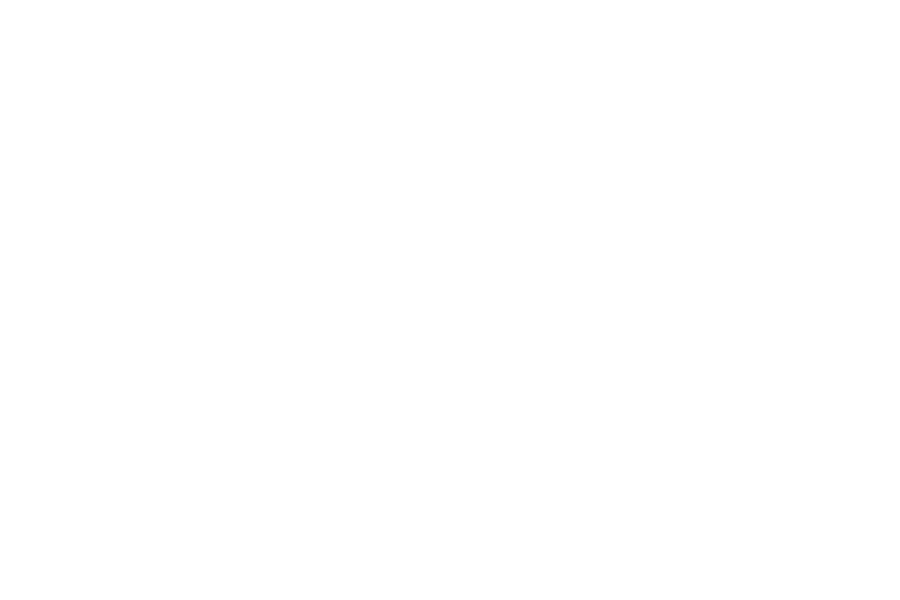

<IPython.core.display.Javascript object>


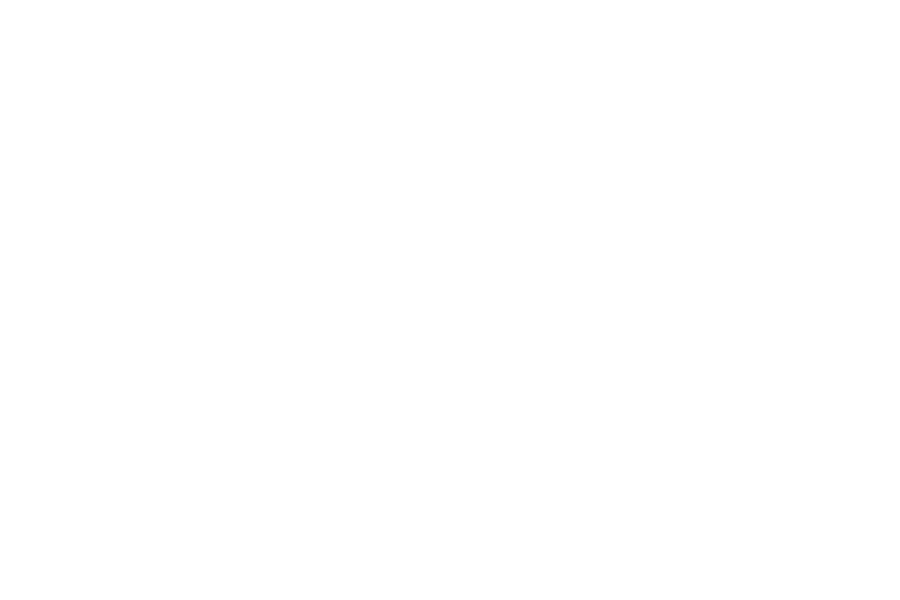

<IPython.core.display.Javascript object>


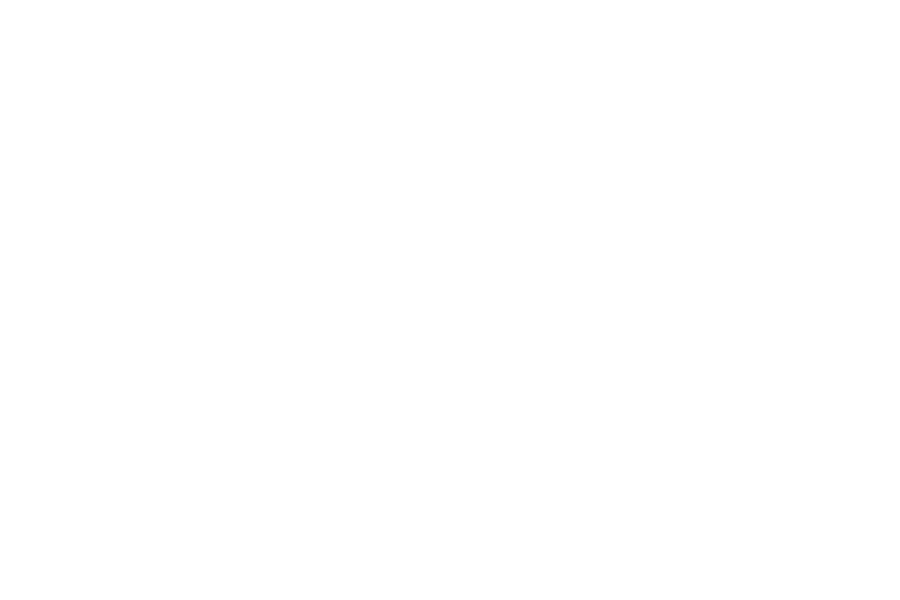

<IPython.core.display.Javascript object>


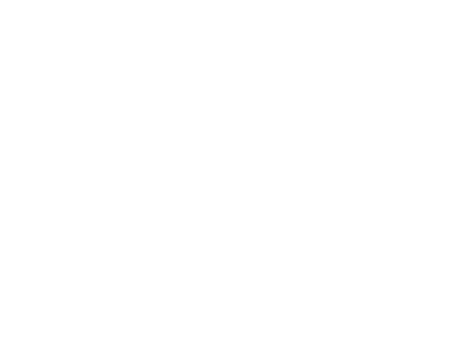

<IPython.core.display.Javascript object>


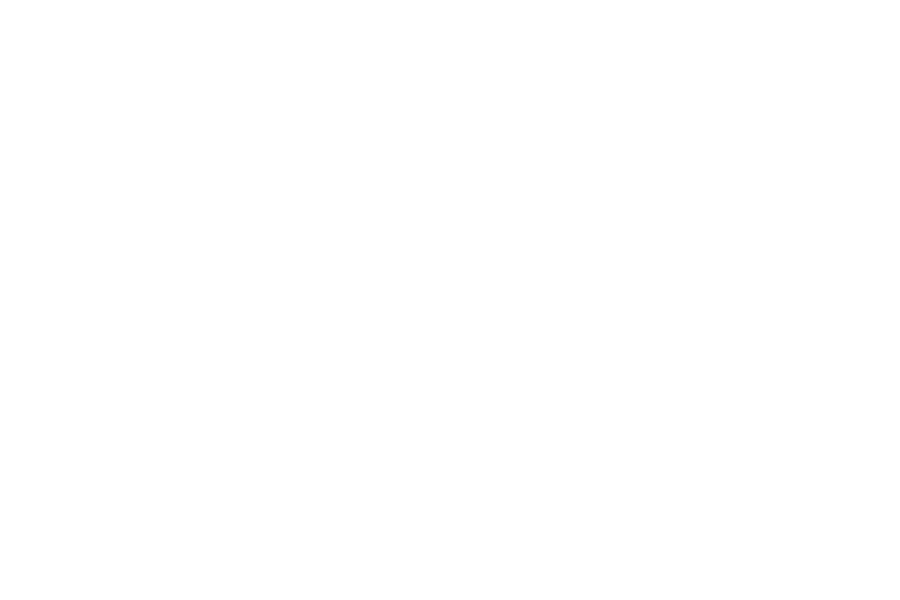

<IPython.core.display.Javascript object>


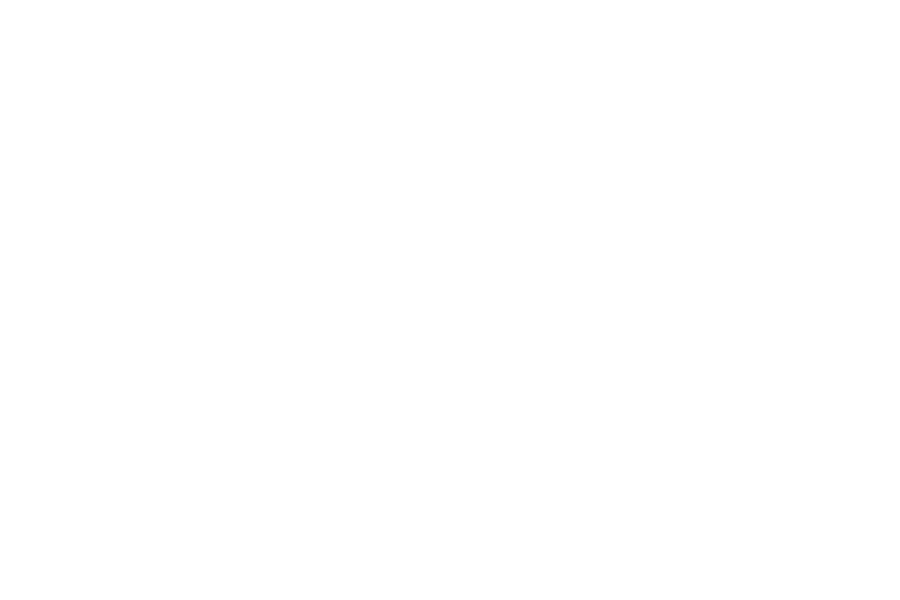

<IPython.core.display.Javascript object>


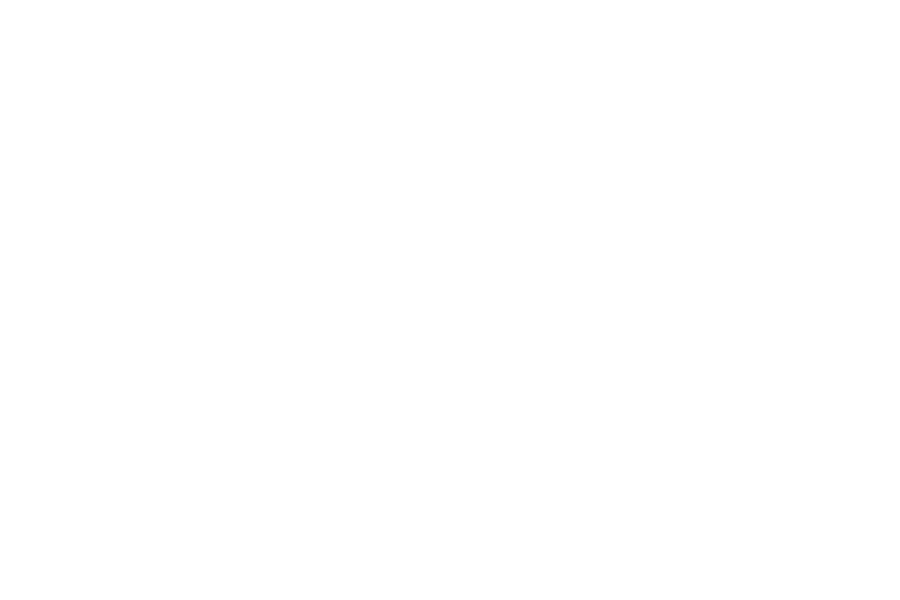

<IPython.core.display.Javascript object>


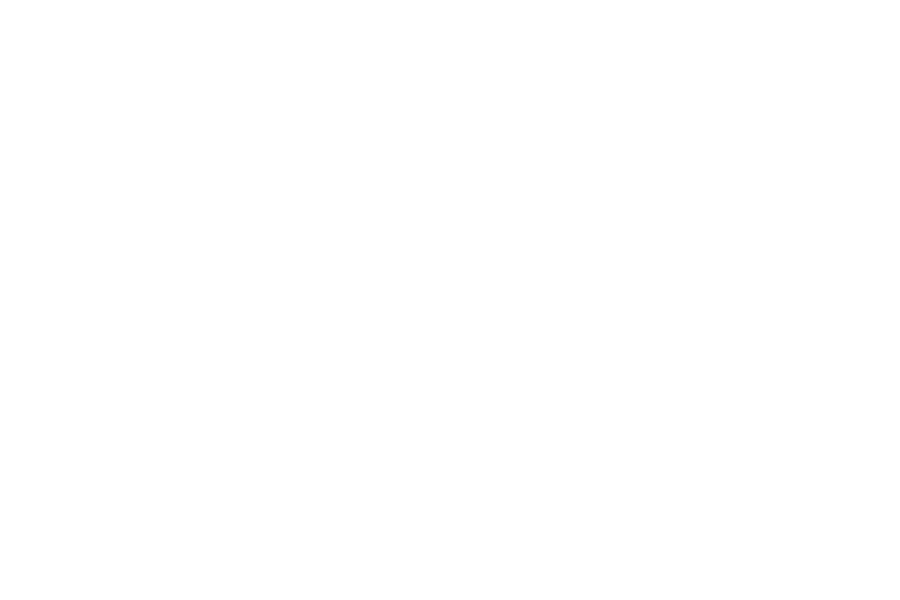

<IPython.core.display.Javascript object>


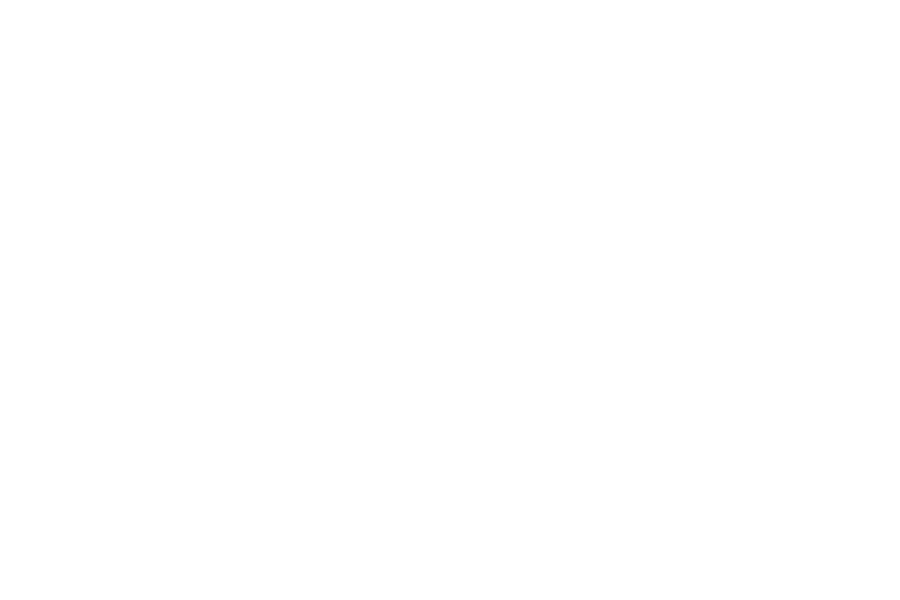

<IPython.core.display.Javascript object>


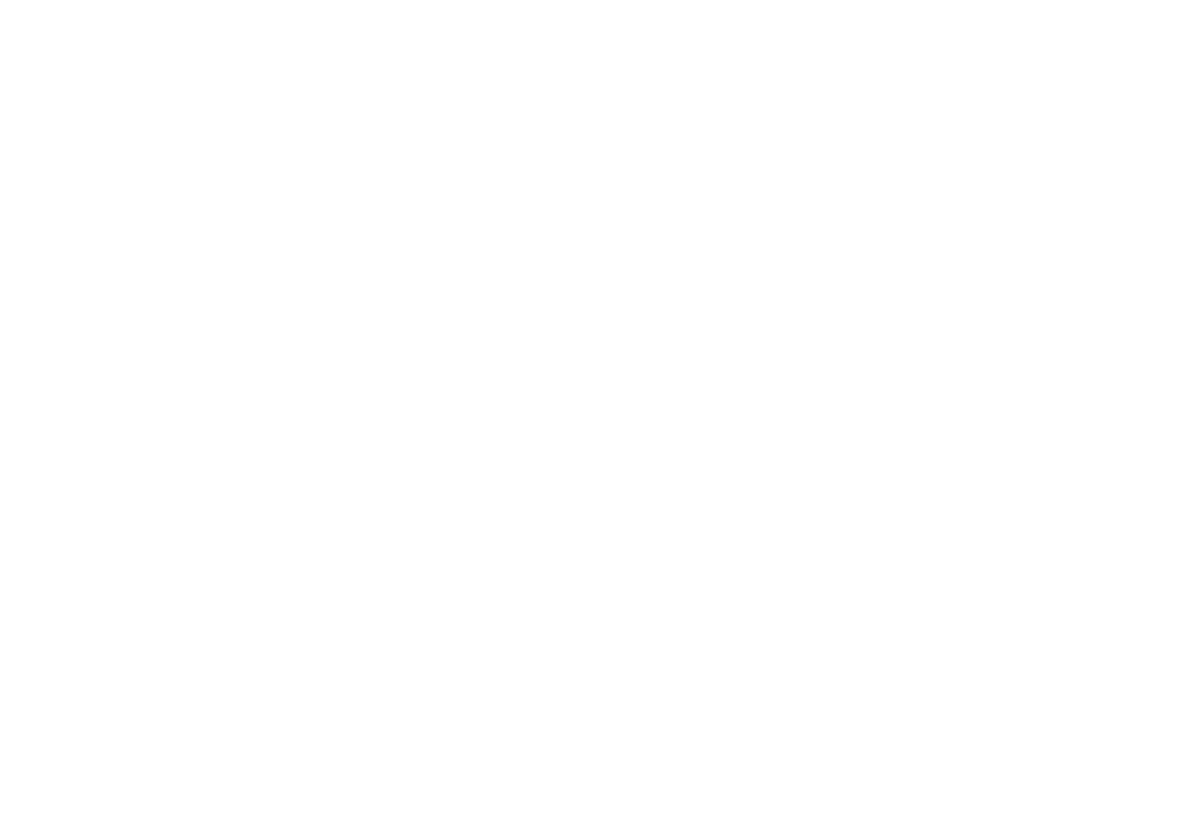

<IPython.core.display.Javascript object>


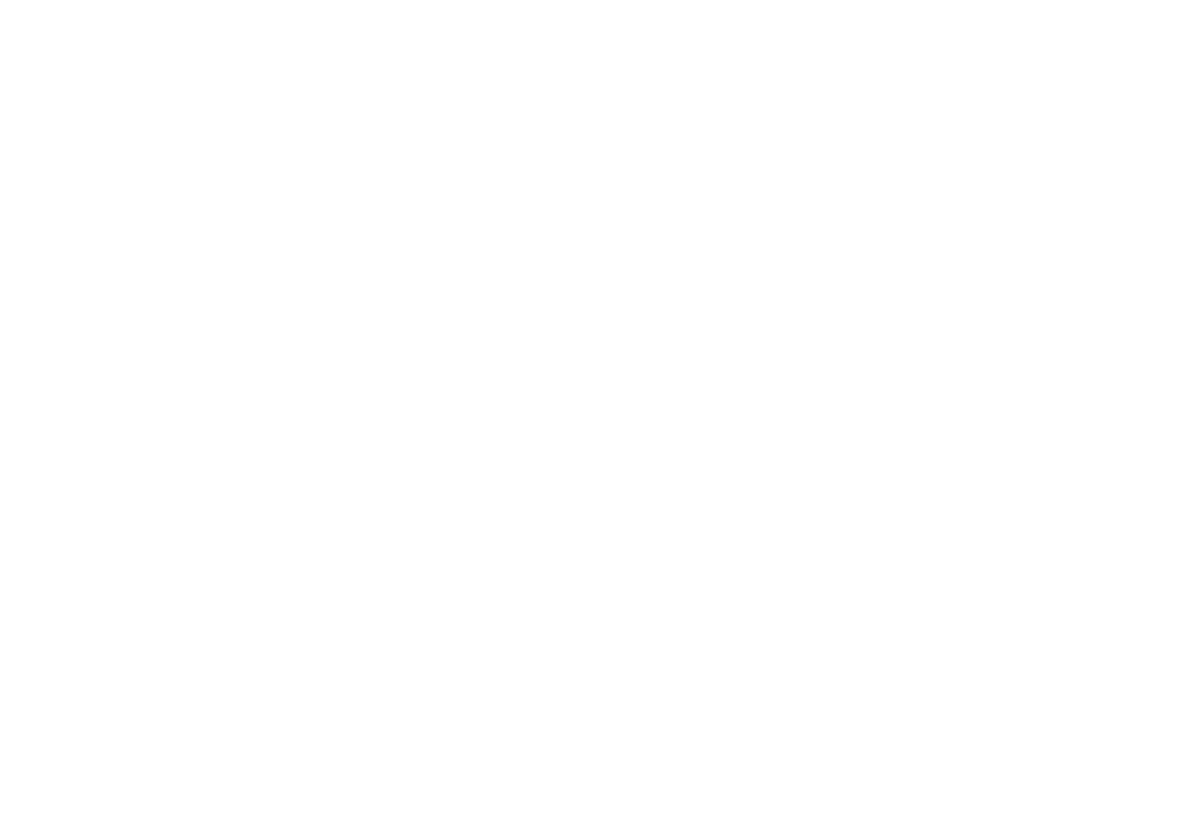

<IPython.core.display.Javascript object>


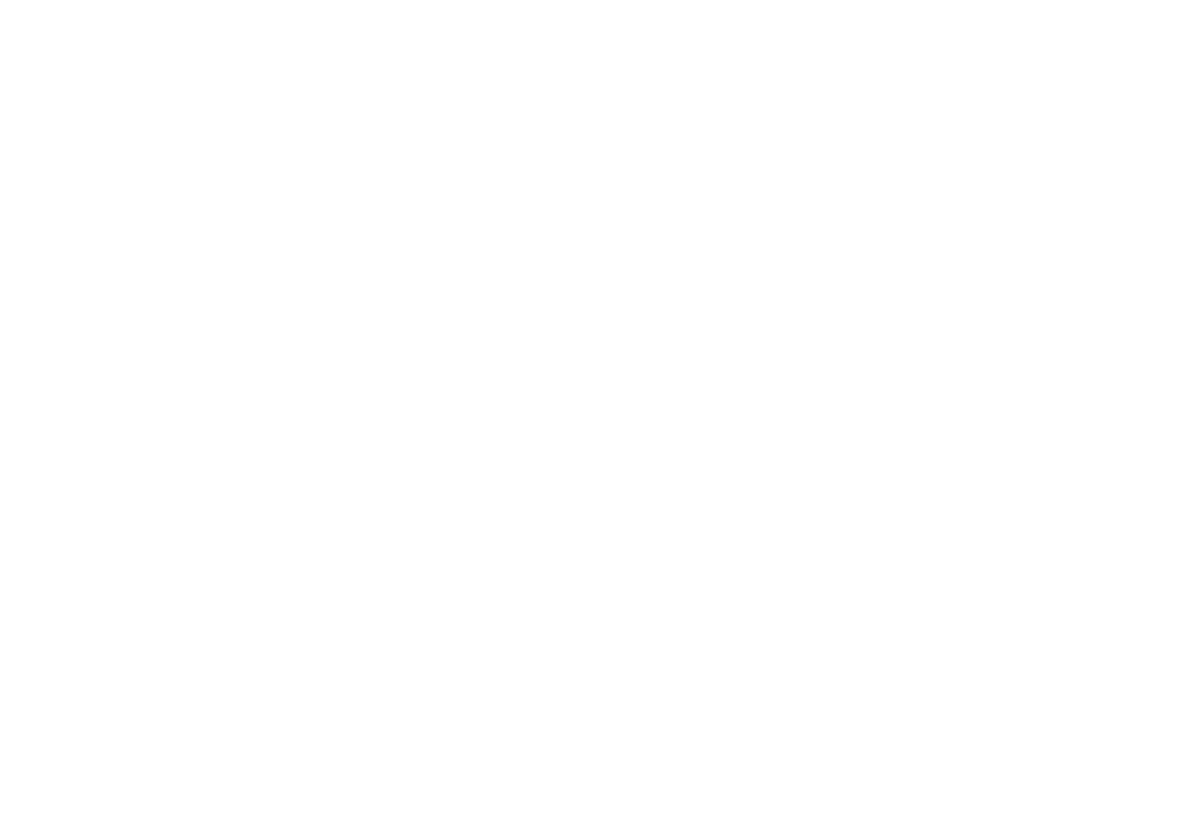

<IPython.core.display.Javascript object>


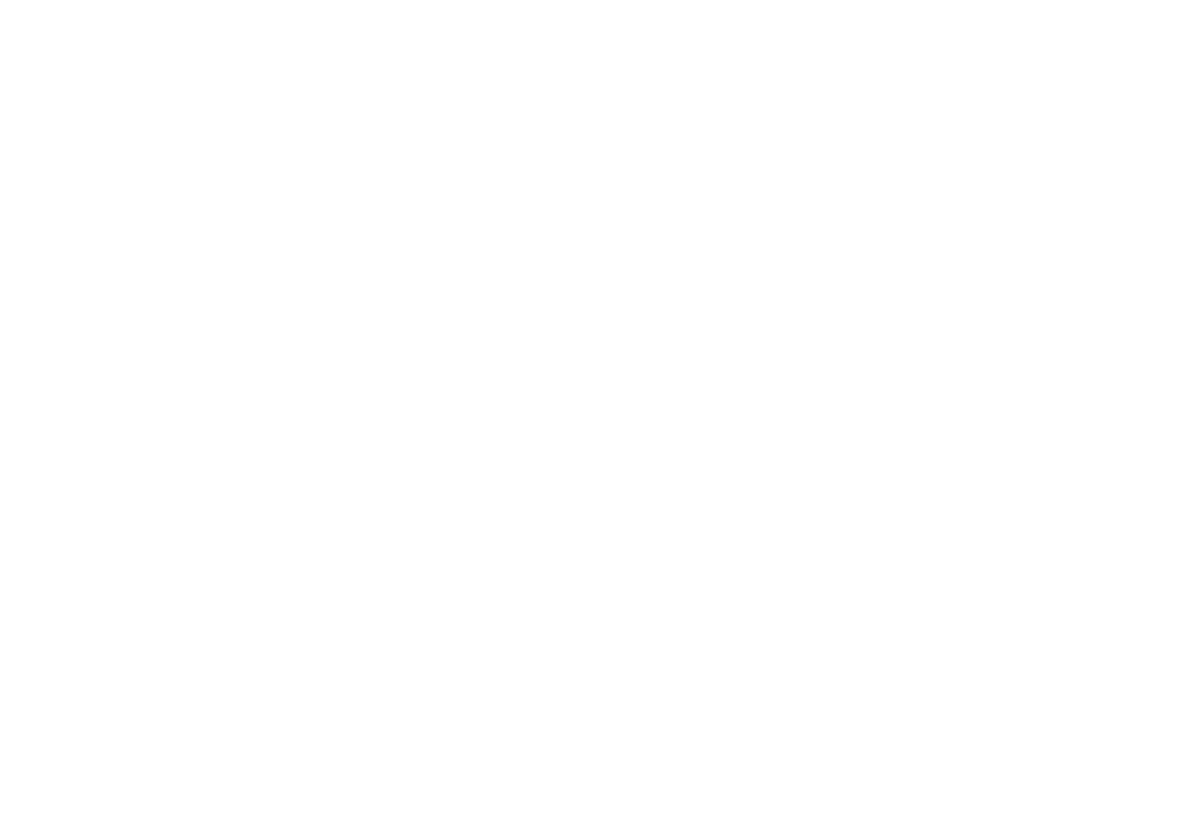

<IPython.core.display.Javascript object>


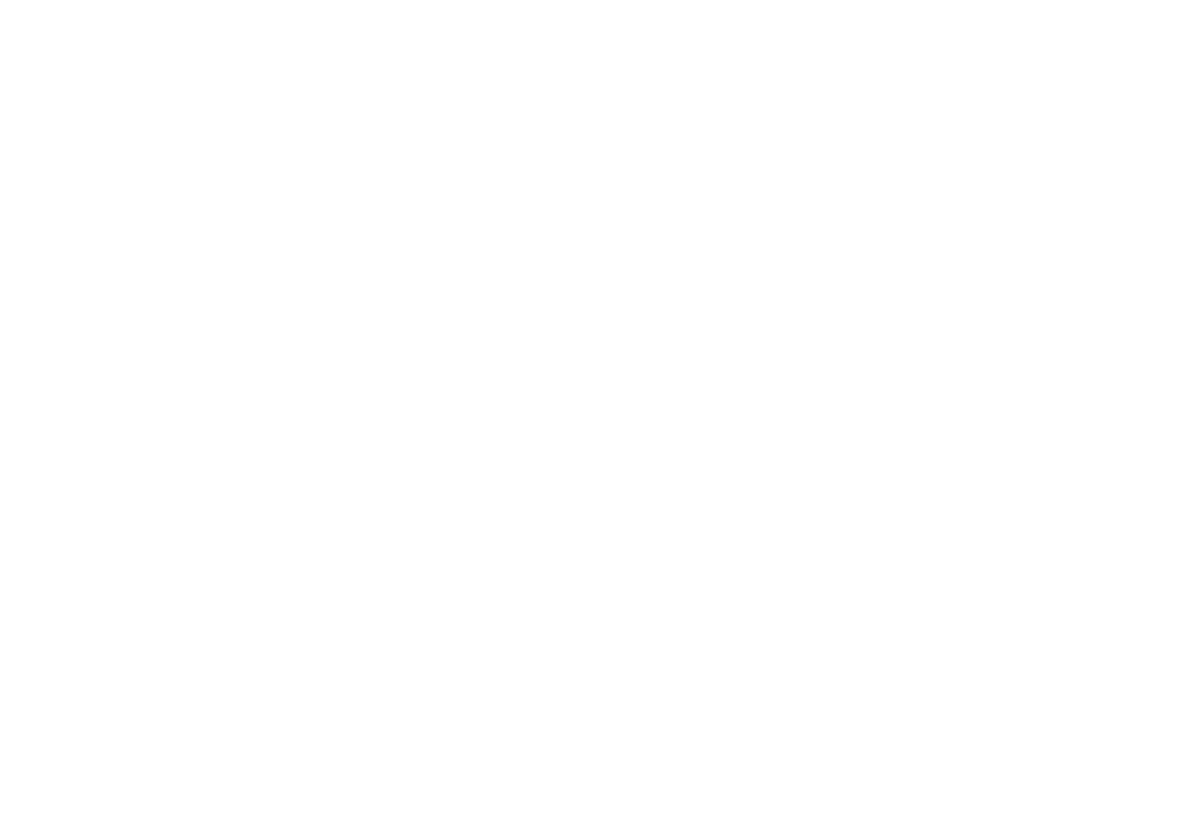

<IPython.core.display.Javascript object>


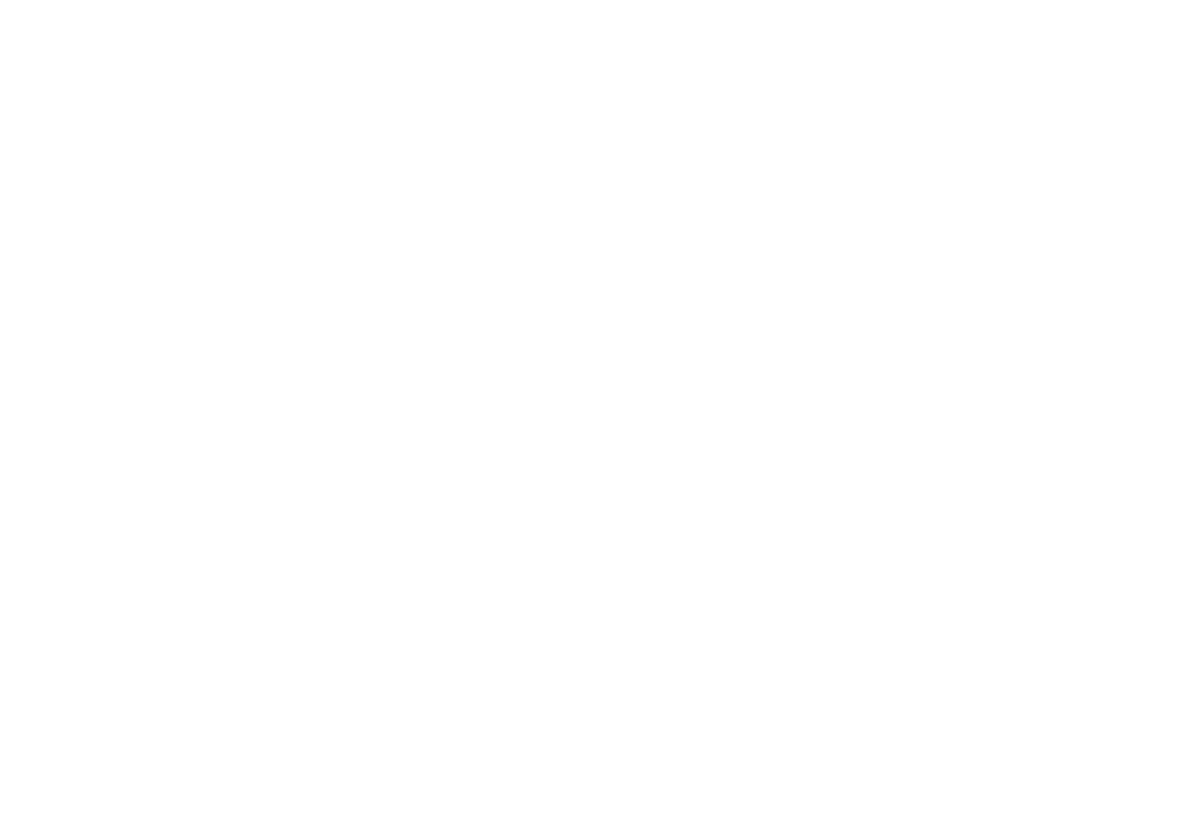

In [42]:
from pandas_profiling import ProfileReport

# configure the profile report
profile = ProfileReport(df, title="Titanic Profiling Report")

# save the profile report
profile.to_file("titanic_report.html")